In [2]:
### Libraries ###

import pandas as pd
import numpy as np
import matplotlib as mlt
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML

# Loading data

In [3]:
my_data = pd.read_csv("/Users/ujwal/Documents/Project2/Data/2015_PUDB_EXPORT_123115.csv", header=0)

In [94]:
data = pd.read_excel("/Users/Ujwal/Documents/Project2/Data/2017_PUDB_EXPORT.xlsx")

In [4]:
my_data.shape

(47480, 87)

In [5]:
my_data.head(10)

,Year,AssignedID,FHLBank,FIPSStateCode,FIPSCountyCode,MSA,FeatureID,Tract,MinPer,TraMedY,...,LienStatus,SpcHsgGoals,FedFinStbltyPlan,AcqTyp,GSEREO,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86
0,2015,1997542,Atlanta,51,69,49020,1740338,511.01,16.96,88049,...,1,2,2,1,2,NaN,NaN,NaN,NaN,NaN
1,2015,1997543,Atlanta,18,39,21140,435227,5.02,30.64,47088,...,1,2,2,1,2,NaN,NaN,NaN,NaN,NaN
2,2015,1997544,Atlanta,13,245,12260,356262,109.03,35.36,66219,...,1,2,2,1,2,NaN,NaN,NaN,NaN,NaN
3,2015,1997545,Atlanta,12,9,37340,294589,644.00,13.56,51191,...,1,2,2,1,2,NaN,NaN,NaN,NaN,NaN
4,2015,1997546,Atlanta,32,3,29820,847388,32.32,22.33,101161,...,1,2,2,1,2,NaN,NaN,NaN,NaN,NaN
5,2015,1997547,Atlanta,24,17,47900,588020,8508.01,41.09,102077,...,1,2,2,1,2,NaN,NaN,NaN,NaN,NaN
6,2015,1997548,Atlanta,12,109,27260,9999999999,208.06,18.19,115572,...,1,2,2,1,2,NaN,NaN,NaN,NaN,NaN
7,2015,1997549,Atlanta,51,510,47900,1492456,2001.07,47.24,95139,...,1,2,2,1,2,NaN,NaN,NaN,NaN,NaN
8,2015,1997550,Atlanta,36,11,12180,942692,412.00,4.07,67939,...,1,2,2,1,2,NaN,NaN,NaN,NaN,NaN
9,2015,1997551,Atlanta,24,25,12580,582856,3017.03,35.87,91026,...,1,2,2,1,2,NaN,NaN,NaN,NaN,NaN


# Loading state Data

In [6]:
state_df = pd.read_excel("/Users/ujwal/Downloads/State_Codes.xlsx", header=0)

In [7]:
state_df.head(10)

,Name,Postal Code,FIPS
0,Alabama,AL,1
1,Alaska,AK,2
2,Arizona,AZ,4
3,Arkansas,AR,5
4,California,CA,6
5,Colorado,CO,8
6,Connecticut,CT,9
7,Delaware,DE,10
8,Florida,FL,12
9,Georgia,GA,13


In [8]:
#Prepare to merge

state_df = state_df.rename(columns = {'FIPS':'FIPSStateCode'})

In [9]:
state_df.head(10)

,Name,Postal Code,FIPSStateCode
0,Alabama,AL,1
1,Alaska,AK,2
2,Arizona,AZ,4
3,Arkansas,AR,5
4,California,CA,6
5,Colorado,CO,8
6,Connecticut,CT,9
7,Delaware,DE,10
8,Florida,FL,12
9,Georgia,GA,13


# Merging the data on FIPS State code

In [10]:
firsttrydf = my_data.merge(state_df, how='left')

In [11]:
firsttrydf.shape

(47480, 89)

In [12]:
firsttrydf.columns

Index(['Year', 'AssignedID', 'FHLBank', 'FIPSStateCode', 'FIPSCountyCode',
       'MSA', 'FeatureID', 'Tract', 'MinPer', 'TraMedY', 'LocMedY', 'Tractrat',
       'Income', 'CurAreY', 'IncRat', 'UPB', 'LTV', 'MortDate', 'AcqDate',
       'Purpose', 'Coop', 'Product', 'FedGuar', 'Term', 'AmorTerm', 'SellType',
       'NumBor', 'First', 'CICA', 'BoRace', 'CoRace', 'BoGender', 'CoGender',
       'BoAge', 'CoAge', 'Occup', 'NumUnits', 'Bed1', 'Bed2', 'Bed3', 'Bed4',
       'Aff1', 'Aff2', 'Aff3', 'Aff4', 'Rent1', 'Rent2', 'Rent3', 'Rent4',
       'RentUt1', 'RentUt2', 'RentUt3', 'RentUt4', 'Geog', 'Rate', 'Amount',
       'Front', 'Back', 'BoCreditScor', 'CoCreditScor', 'PMI', 'Self',
       'PropType', 'ArmIndex', 'ArmMarg', 'PrepayP', 'BoEth', 'Race2', 'Race3',
       'Race4', 'Race5', 'CoEth', 'CoRace2', 'CoRace3', 'CoRace4', 'CoRace5',
       'HOEPA', 'LienStatus', 'SpcHsgGoals', 'FedFinStbltyPlan', 'AcqTyp',
       'GSEREO', 'Unnamed: 82', 'Unnamed: 83', 'Unnamed: 84', 'Unnamed: 85',
 

In [13]:
firsttrydf.head(10)

,Year,AssignedID,FHLBank,FIPSStateCode,FIPSCountyCode,MSA,FeatureID,Tract,MinPer,TraMedY,...,FedFinStbltyPlan,AcqTyp,GSEREO,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Name,Postal Code
0,2015,1997542,Atlanta,51,69,49020,1740338,511.01,16.96,88049,...,2,1,2,NaN,NaN,NaN,NaN,NaN,Virginia,VA
1,2015,1997543,Atlanta,18,39,21140,435227,5.02,30.64,47088,...,2,1,2,NaN,NaN,NaN,NaN,NaN,Indiana,IN
2,2015,1997544,Atlanta,13,245,12260,356262,109.03,35.36,66219,...,2,1,2,NaN,NaN,NaN,NaN,NaN,Georgia,GA
3,2015,1997545,Atlanta,12,9,37340,294589,644.00,13.56,51191,...,2,1,2,NaN,NaN,NaN,NaN,NaN,Florida,FL
4,2015,1997546,Atlanta,32,3,29820,847388,32.32,22.33,101161,...,2,1,2,NaN,NaN,NaN,NaN,NaN,Nevada,NV
5,2015,1997547,Atlanta,24,17,47900,588020,8508.01,41.09,102077,...,2,1,2,NaN,NaN,NaN,NaN,NaN,Maryland,MD
6,2015,1997548,Atlanta,12,109,27260,9999999999,208.06,18.19,115572,...,2,1,2,NaN,NaN,NaN,NaN,NaN,Florida,FL
7,2015,1997549,Atlanta,51,510,47900,1492456,2001.07,47.24,95139,...,2,1,2,NaN,NaN,NaN,NaN,NaN,Virginia,VA
8,2015,1997550,Atlanta,36,11,12180,942692,412.00,4.07,67939,...,2,1,2,NaN,NaN,NaN,NaN,NaN,New York,NY
9,2015,1997551,Atlanta,24,25,12580,582856,3017.03,35.87,91026,...,2,1,2,NaN,NaN,NaN,NaN,NaN,Maryland,MD


In [16]:
firsttrydf = firsttrydf.rename(columns={'Name':'PropertyLocation'})

In [17]:
firsttrydf.columns

Index(['Year', 'AssignedID', 'FHLBank', 'FIPSStateCode', 'FIPSCountyCode',
       'MSA', 'FeatureID', 'Tract', 'MinPer', 'TraMedY', 'LocMedY', 'Tractrat',
       'Income', 'CurAreY', 'IncRat', 'UPB', 'LTV', 'MortDate', 'AcqDate',
       'Purpose', 'Coop', 'Product', 'FedGuar', 'Term', 'AmorTerm', 'SellType',
       'NumBor', 'First', 'CICA', 'BoRace', 'CoRace', 'BoGender', 'CoGender',
       'BoAge', 'CoAge', 'Occup', 'NumUnits', 'Bed1', 'Bed2', 'Bed3', 'Bed4',
       'Aff1', 'Aff2', 'Aff3', 'Aff4', 'Rent1', 'Rent2', 'Rent3', 'Rent4',
       'RentUt1', 'RentUt2', 'RentUt3', 'RentUt4', 'Geog', 'Rate', 'Amount',
       'Front', 'Back', 'BoCreditScor', 'CoCreditScor', 'PMI', 'Self',
       'PropType', 'ArmIndex', 'ArmMarg', 'PrepayP', 'BoEth', 'Race2', 'Race3',
       'Race4', 'Race5', 'CoEth', 'CoRace2', 'CoRace3', 'CoRace4', 'CoRace5',
       'HOEPA', 'LienStatus', 'SpcHsgGoals', 'FedFinStbltyPlan', 'AcqTyp',
       'GSEREO', 'Unnamed: 82', 'Unnamed: 83', 'Unnamed: 84', 'Unnamed: 85',
 

In [18]:
data1 = firsttrydf.head(50)
display(HTML(data1.to_html()))

,Year,AssignedID,FHLBank,FIPSStateCode,FIPSCountyCode,MSA,FeatureID,Tract,MinPer,TraMedY,LocMedY,Tractrat,Income,CurAreY,IncRat,UPB,LTV,MortDate,AcqDate,Purpose,Coop,Product,FedGuar,Term,AmorTerm,SellType,NumBor,First,CICA,BoRace,CoRace,BoGender,CoGender,BoAge,CoAge,Occup,NumUnits,Bed1,Bed2,Bed3,Bed4,Aff1,Aff2,Aff3,Aff4,Rent1,Rent2,Rent3,Rent4,RentUt1,RentUt2,RentUt3,RentUt4,Geog,Rate,Amount,Front,Back,BoCreditScor,CoCreditScor,PMI,Self,PropType,ArmIndex,ArmMarg,PrepayP,BoEth,Race2,Race3,Race4,Race5,CoEth,CoRace2,CoRace3,CoRace4,CoRace5,HOEPA,LienStatus,SpcHsgGoals,FedFinStbltyPlan,AcqTyp,GSEREO,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,PropertyLocation,Postal Code
0,2015,1997542,Atlanta,51,69,49020,1740338,511.01,16.96,88049,61537,1.4308,110904,65300,1.6984,334244,1.00,2015,2015,2,2,1,2,360,360,1,1,2,9,7,8,1,4,44,98,1,1,98,98,98,98,2,2,2,2,9999999999,9999999999,9999999999,9999999999,9999999999,9999999999,9999999999,9999999999,2,0.0338,338100,0.1923,0.4458,4,9,0.0,2,PT07,99,99999,12/31/9999,3,6,6,6,6,5,8,8,8,8,2,1,2,2,1,2,NaN,NaN,NaN,NaN,NaN,Virginia,VA
1,2015,1997543,Atlanta,18,39,21140,435227,5.02,30.64,47088,53742,0.8762,126984,51800,2.4514,126790,0.59,2015,2015,1,2,1,2,360,360,1,2,2,9,5,5,1,2,54,54,1,1,98,98,98,98,2,2,2,2,9999999999,9999999999,9999999999,9999999999,9999999999,9999999999,9999999999,9999999999,2,0.0350,139500,0.0831,0.1253,5,5,0.0,2,PT07,99,99999,12/31/9999,2,6,6,6,6,2,6,6,6,6,2,1,2,2,1,2,NaN,NaN,NaN,NaN,NaN,Indiana,IN
2,2015,1997544,Atlanta,13,245,12260,356262,109.03,35.36,66219,54953,1.2050,72972,57900,1.2603,173761,0.65,2015,2015,2,2,1,2,360,360,1,2,2,9,7,7,1,2,66,64,1,1,98,98,98,98,2,2,2,2,9999999999,9999999999,9999999999,9999999999,9999999999,9999999999,9999999999,9999999999,2,0.0350,176000,0.1951,0.2960,3,4,0.0,2,PT01,99,99999,12/31/9999,3,6,6,6,6,3,6,6,6,6,2,1,2,2,1,2,NaN,NaN,NaN,NaN,NaN,Georgia,GA
3,2015,1997545,Atlanta,12,9,37340,294589,644.00,13.56,51191,60842,0.8414,88176,58600,1.5047,103961,0.97,2015,2015,2,2,1,2,360,360,1,2,2,9,5,5,1,2,79,77,1,1,98,98,98,98,2,2,2,2,9999999999,9999999999,9999999999,9999999999,9999999999,9999999999,9999999999,9999999999,2,0.0350,105300,0.0817,0.1741,5,5,0.0,2,PT01,99,99999,12/31/9999,2,6,6,6,6,2,6,6,6,6,2,1,2,2,1,2,NaN,NaN,NaN,NaN,NaN,Florida,FL
4,2015,1997546,Atlanta,32,3,29820,847388,32.32,22.33,101161,63888,1.5834,101424,64300,1.5774,411696,0.84,2015,2015,1,2,1,2,360,360,1,2,2,9,5,5,1,2,65,54,1,1,98,98,98,98,2,2,2,2,9999999999,9999999999,9999999999,9999999999,9999999999,9999999999,9999999999,9999999999,2,0.0350,417000,0.2706,0.4892,5,5,0.0,2,PT01,99,99999,12/31/9999,2,6,6,6,6,2,6,6,6,6,2,1,2,2,1,2,NaN,NaN,NaN,NaN,NaN,Nevada,NV
5,2015,1997547,Atlanta,24,17,47900,588020,8508.01,41.09,102077,100890,1.0118,54408,105700,0.5147,260840,1.03,2014,2015,1,2,1,2,360,360,1,2,1,9,5,5,1,2,28,28,1,1,98,98,98,98,2,2,2,2,9999999999,9999999999,9999999999,9999999999,9999999999,9999999999,9999999999,9999999999,2,0.0363,264550,0.3759,0.3882,3,4,0.0,2,PT01,99,99999,12/31/9999,2,6,6,6,6,2,6,6,6,6,2,1,2,2,1,2,NaN,NaN,NaN,NaN,NaN,Maryland,MD
6,2015,1997548,Atlanta,12,109,27260,9999999999,208.06,18.19,115572,63927,1.8079,191724,67300,2.8488,291248,1.00,2015,2015,1,2,1,2,360,360,1,2,1,9,7,7,2,1,57,57,1,1,98,98,98,98,2,2,2,2,9999999999,9999999999,9999999999,9999999999,9999999999,9999999999,9999999999,9999999999,2,0.0350,295000,0.1235,0.4569,5,5,0.0,2,PT07,99,99999,12/31/9999,1,6,6,6,6,1,6,6,6,6,2,1,2,2,1,2,NaN,NaN,NaN,NaN,NaN,Florida,FL
7,2015,1997549,Atlanta,51,510,47900,1492456,2001.07,47.24,95139,100890,0.9430,82500,105700,0.7805,265664,1.03,2015,2015,1,2,1,2,360,360,1,2,1,9,5,5,1,2,32,24,1,1,98,98,98,98,2,2,2,2,9999999999,9999999999,9999999999,9999999999,9999999999,9999999999,9999999999,9999999999,2,0.0350,268650,0.2739,0.4011,5,4,0.0,2,PT11,99,99999,12/31/9999,1,6,6,6,6,2,6,6,6,6,2,1,2,2,1,2,NaN,NaN,NaN,NaN,NaN,Virginia,VA
8,2015,1997550,Atlanta,36,11,12180,942692,412.00,4.07,67939,54294,1.2513,62076,56900,1.0910,152826,1.00,2014,2015,1,2,1,2,360,360,1,2,2,9,5,5,1,2

In [46]:
#Converting Amorterm in years to calculate PMT
for i in firsttrydf.index:
    firsttrydf.at[i,'AmorTerm'] = firsttrydf.at[i,'AmorTerm'] /12

In [47]:
# Taking first row to find pmt for a single application

np.pmt(rate=firsttrydf.at[0,'Rate'], fv=0, nper=firsttrydf.at[0,'AmorTerm'], pv=firsttrydf.at[0,'Amount'])

-18107.607252118236

In [48]:
# Creating a dummy PMT column

firsttrydf['PMT'] = "Nan"

In [49]:
#Applyting pmt function to the entire dataFrame

for i in firsttrydf.index:
    firsttrydf.at[i,'PMT'] = np.pmt(rate=firsttrydf.at[i,'Rate'], fv=0, nper=firsttrydf.at[i,'AmorTerm'], pv=firsttrydf.at[i,'Amount'])

In [50]:
data2 = firsttrydf.head(10)
display(HTML(data2.to_html()))

,Year,AssignedID,FHLBank,FIPSStateCode,FIPSCountyCode,MSA,FeatureID,Tract,MinPer,TraMedY,LocMedY,Tractrat,Income,CurAreY,IncRat,UPB,LTV,MortDate,AcqDate,Purpose,Coop,Product,FedGuar,Term,AmorTerm,SellType,NumBor,First,CICA,BoRace,CoRace,BoGender,CoGender,BoAge,CoAge,Occup,NumUnits,Bed1,Bed2,Bed3,Bed4,Aff1,Aff2,Aff3,Aff4,Rent1,Rent2,Rent3,Rent4,RentUt1,RentUt2,RentUt3,RentUt4,Geog,Rate,Amount,Front,Back,BoCreditScor,CoCreditScor,PMI,Self,PropType,ArmIndex,ArmMarg,PrepayP,BoEth,Race2,Race3,Race4,Race5,CoEth,CoRace2,CoRace3,CoRace4,CoRace5,HOEPA,LienStatus,SpcHsgGoals,FedFinStbltyPlan,AcqTyp,GSEREO,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,PropertyLocation,Postal Code,PMT
0,2015,1997542,Atlanta,51,69,49020,1740338,511.01,16.96,88049,61537,1.4308,110904,65300,1.6984,334244,1.00,2015,2015,2,2,1,2,360,30,1,1,2,9,7,8,1,4,44,98,1,1,98,98,98,98,2,2,2,2,9999999999,9999999999,9999999999,9999999999,9999999999,9999999999,9999999999,9999999999,2,0.0338,338100,0.1923,0.4458,4,9,0.0,2,PT07,99,99999,12/31/9999,3,6,6,6,6,5,8,8,8,8,2,1,2,2,1,2,NaN,NaN,NaN,NaN,NaN,Virginia,VA,-18107.6
1,2015,1997543,Atlanta,18,39,21140,435227,5.02,30.64,47088,53742,0.8762,126984,51800,2.4514,126790,0.59,2015,2015,1,2,1,2,360,30,1,2,2,9,5,5,1,2,54,54,1,1,98,98,98,98,2,2,2,2,9999999999,9999999999,9999999999,9999999999,9999999999,9999999999,9999999999,9999999999,2,0.0350,139500,0.0831,0.1253,5,5,0.0,2,PT07,99,99999,12/31/9999,2,6,6,6,6,2,6,6,6,6,2,1,2,2,1,2,NaN,NaN,NaN,NaN,NaN,Indiana,IN,-7584.8
2,2015,1997544,Atlanta,13,245,12260,356262,109.03,35.36,66219,54953,1.2050,72972,57900,1.2603,173761,0.65,2015,2015,2,2,1,2,360,30,1,2,2,9,7,7,1,2,66,64,1,1,98,98,98,98,2,2,2,2,9999999999,9999999999,9999999999,9999999999,9999999999,9999999999,9999999999,9999999999,2,0.0350,176000,0.1951,0.2960,3,4,0.0,2,PT01,99,99999,12/31/9999,3,6,6,6,6,3,6,6,6,6,2,1,2,2,1,2,NaN,NaN,NaN,NaN,NaN,Georgia,GA,-9569.35
3,2015,1997545,Atlanta,12,9,37340,294589,644.00,13.56,51191,60842,0.8414,88176,58600,1.5047,103961,0.97,2015,2015,2,2,1,2,360,30,1,2,2,9,5,5,1,2,79,77,1,1,98,98,98,98,2,2,2,2,9999999999,9999999999,9999999999,9999999999,9999999999,9999999999,9999999999,9999999999,2,0.0350,105300,0.0817,0.1741,5,5,0.0,2,PT01,99,99999,12/31/9999,2,6,6,6,6,2,6,6,6,6,2,1,2,2,1,2,NaN,NaN,NaN,NaN,NaN,Florida,FL,-5725.3
4,2015,1997546,Atlanta,32,3,29820,847388,32.32,22.33,101161,63888,1.5834,101424,64300,1.5774,411696,0.84,2015,2015,1,2,1,2,360,30,1,2,2,9,5,5,1,2,65,54,1,1,98,98,98,98,2,2,2,2,9999999999,9999999999,9999999999,9999999999,9999999999,9999999999,9999999999,9999999999,2,0.0350,417000,0.2706,0.4892,5,5,0.0,2,PT01,99,99999,12/31/9999,2,6,6,6,6,2,6,6,6,6,2,1,2,2,1,2,NaN,NaN,NaN,NaN,NaN,Nevada,NV,-22672.8
5,2015,1997547,Atlanta,24,17,47900,588020,8508.01,41.09,102077,100890,1.0118,54408,105700,0.5147,260840,1.03,2014,2015,1,2,1,2,360,30,1,2,1,9,5,5,1,2,28,28,1,1,98,98,98,98,2,2,2,2,9999999999,9999999999,9999999999,9999999999,9999999999,9999999999,9999999999,9999999999,2,0.0363,264550,0.3759,0.3882,3,4,0.0,2,PT01,99,99999,12/31/9999,2,6,6,6,6,2,6,6,6,6,2,1,2,2,1,2,NaN,NaN,NaN,NaN,NaN,Maryland,MD,-14619.2
6,2015,1997548,Atlanta,12,109,27260,9999999999,208.06,18.19,115572,63927,1.8079,191724,67300,2.8488,291248,1.00,2015,2015,1,2,1,2,360,30,1,2,1,9,7,7,2,1,57,57,1,1,98,98,98,98,2,2,2,2,9999999999,9999999999,9999999999,9999999999,9999999999,9999999999,9999999999,9999999999,2,0.0350,295000,0.1235,0.4569,5,5,0.0,2,PT07,99,99999,12/31/9999,1,6,6,6,6,1,6,6,6,6,2,1,2,2,1,2,NaN,NaN,NaN,NaN,NaN,Florida,FL,-16039.5
7,2015,1997549,Atlanta,51,510,47900,1492456,2001.07,47.24,95139,100890,0.9430,82500,105700,0.7805,265664,1.03,2015,2015,1,2,1,2,360,30,1,2,1,9,5,5,1,2,32,24,1,1,98,98,98,98,2,2,2,2,9999999999,9999999999,9999999999,9999999999,9999999999,9999999999,9999999999,9999999999,2,0.0350,268650,0.2739,0.4011,5,4,0.0,2,PT11,99,99999,12/31/9999,1,6,6,6,6,2,6,6,6,6,2,1,2,2,1,2,NaN,NaN,NaN,NaN,NaN,Virginia,VA,-14606.9
8,2015,1997550,Atlanta,36,11,12180,942692,412.00,4.07,67939,54294,1.2513,62076,

In [51]:
firsttrydf.columns

Index(['Year', 'AssignedID', 'FHLBank', 'FIPSStateCode', 'FIPSCountyCode',
       'MSA', 'FeatureID', 'Tract', 'MinPer', 'TraMedY', 'LocMedY', 'Tractrat',
       'Income', 'CurAreY', 'IncRat', 'UPB', 'LTV', 'MortDate', 'AcqDate',
       'Purpose', 'Coop', 'Product', 'FedGuar', 'Term', 'AmorTerm', 'SellType',
       'NumBor', 'First', 'CICA', 'BoRace', 'CoRace', 'BoGender', 'CoGender',
       'BoAge', 'CoAge', 'Occup', 'NumUnits', 'Bed1', 'Bed2', 'Bed3', 'Bed4',
       'Aff1', 'Aff2', 'Aff3', 'Aff4', 'Rent1', 'Rent2', 'Rent3', 'Rent4',
       'RentUt1', 'RentUt2', 'RentUt3', 'RentUt4', 'Geog', 'Rate', 'Amount',
       'Front', 'Back', 'BoCreditScor', 'CoCreditScor', 'PMI', 'Self',
       'PropType', 'ArmIndex', 'ArmMarg', 'PrepayP', 'BoEth', 'Race2', 'Race3',
       'Race4', 'Race5', 'CoEth', 'CoRace2', 'CoRace3', 'CoRace4', 'CoRace5',
       'HOEPA', 'LienStatus', 'SpcHsgGoals', 'FedFinStbltyPlan', 'AcqTyp',
       'GSEREO', 'Unnamed: 82', 'Unnamed: 83', 'Unnamed: 84', 'Unnamed: 85',
 

# Filtering unwanted columns

In [52]:
interested_col_list = ['Year', 'AssignedID', 'FHLBank', 'FIPSStateCode', 'FIPSCountyCode',
       'Income', 'CurAreY', 'IncRat', 'UPB', 'LTV', 'MortDate', 'AcqDate',
       'Purpose', 'Coop', 'Product', 'FedGuar', 'AmorTerm', 'SellType',
       'NumBor', 'First', 'BoAge', 'CoAge', 'Occup', 'Rate', 'Amount',
       'Front', 'Back', 'BoCreditScor', 'CoCreditScor', 'PMI', 'PropertyLocation', 'PMT']

In [95]:
# Dropping unwanted columns on 2017 data [Chaitanya's Analysis]
data_corr = data.drop(['Year','Assigned ID','BoEth', 'Race2', 'Race3', 'Race4', 'Race5','CoEth', 'Corace2', 'Corace3', 'Corace4', 'Corace5','Rent1', 'Rent2', 'Rent3', 'Rent4',
       'RentUt1', 'RentUt2', 'RentUt3', 'RentUt4'], axis=1)

In [53]:
filtered_col_df = firsttrydf[interested_col_list]

In [54]:
data3 = filtered_col_df.head(100)
display(HTML(data3.to_html()))

,Year,AssignedID,FHLBank,FIPSStateCode,FIPSCountyCode,Income,CurAreY,IncRat,UPB,LTV,MortDate,AcqDate,Purpose,Coop,Product,FedGuar,AmorTerm,SellType,NumBor,First,BoAge,CoAge,Occup,Rate,Amount,Front,Back,BoCreditScor,CoCreditScor,PMI,PropertyLocation,PMT
0,2015,1997542,Atlanta,51,69,110904,65300,1.6984,334244,1.00,2015,2015,2,2,1,2,30,1,1,2,44,98,1,0.0338,338100,0.1923,0.4458,4,9,0.0,Virginia,-18107.6
1,2015,1997543,Atlanta,18,39,126984,51800,2.4514,126790,0.59,2015,2015,1,2,1,2,30,1,2,2,54,54,1,0.0350,139500,0.0831,0.1253,5,5,0.0,Indiana,-7584.8
2,2015,1997544,Atlanta,13,245,72972,57900,1.2603,173761,0.65,2015,2015,2,2,1,2,30,1,2,2,66,64,1,0.0350,176000,0.1951,0.2960,3,4,0.0,Georgia,-9569.35
3,2015,1997545,Atlanta,12,9,88176,58600,1.5047,103961,0.97,2015,2015,2,2,1,2,30,1,2,2,79,77,1,0.0350,105300,0.0817,0.1741,5,5,0.0,Florida,-5725.3
4,2015,1997546,Atlanta,32,3,101424,64300,1.5774,411696,0.84,2015,2015,1,2,1,2,30,1,2,2,65,54,1,0.0350,417000,0.2706,0.4892,5,5,0.0,Nevada,-22672.8
5,2015,1997547,Atlanta,24,17,54408,105700,0.5147,260840,1.03,2014,2015,1,2,1,2,30,1,2,1,28,28,1,0.0363,264550,0.3759,0.3882,3,4,0.0,Maryland,-14619.2
6,2015,1997548,Atlanta,12,109,191724,67300,2.8488,291248,1.00,2015,2015,1,2,1,2,30,1,2,1,57,57,1,0.0350,295000,0.1235,0.4569,5,5,0.0,Florida,-16039.5
7,2015,1997549,Atlanta,51,510,82500,105700,0.7805,265664,1.03,2015,2015,1,2,1,2,30,1,2,1,32,24,1,0.0350,268650,0.2739,0.4011,5,4,0.0,Virginia,-14606.9
8,2015,1997550,Atlanta,36,11,62076,56900,1.0910,152826,1.00,2014,2015,1,2,1,2,30,1,2,2,65,50,1,0.0363,155000,0.2015,0.3225,5,5,0.0,New York,-8565.38
9,2015,1997551,Atlanta,24,25,159096,85600,1.8586,343473,0.90,2014,2015,2,2,1,2,30,1,2,2,48,48,1,0.0388,348800,0.1750,0.2976,5,5,0.0,Maryland,-19878.3


In [55]:
#Converting negative numpy output to positive

print(abs(filtered_col_df.at[0,'PMT']))

18107.607252118236


In [56]:
for i in filtered_col_df.index:
    filtered_col_df.at[i,'PMT'] = abs(filtered_col_df.at[i,'PMT'])

In [57]:
filtered_col_df.head(10)

,Year,AssignedID,FHLBank,FIPSStateCode,FIPSCountyCode,Income,CurAreY,IncRat,UPB,LTV,...,Occup,Rate,Amount,Front,Back,BoCreditScor,CoCreditScor,PMI,PropertyLocation,PMT
0,2015,1997542,Atlanta,51,69,110904,65300,1.6984,334244,1.00,...,1,0.0338,338100,0.1923,0.4458,4,9,0.0,Virginia,18107.6
1,2015,1997543,Atlanta,18,39,126984,51800,2.4514,126790,0.59,...,1,0.0350,139500,0.0831,0.1253,5,5,0.0,Indiana,7584.8
2,2015,1997544,Atlanta,13,245,72972,57900,1.2603,173761,0.65,...,1,0.0350,176000,0.1951,0.2960,3,4,0.0,Georgia,9569.35
3,2015,1997545,Atlanta,12,9,88176,58600,1.5047,103961,0.97,...,1,0.0350,105300,0.0817,0.1741,5,5,0.0,Florida,5725.3
4,2015,1997546,Atlanta,32,3,101424,64300,1.5774,411696,0.84,...,1,0.0350,417000,0.2706,0.4892,5,5,0.0,Nevada,22672.8
5,2015,1997547,Atlanta,24,17,54408,105700,0.5147,260840,1.03,...,1,0.0363,264550,0.3759,0.3882,3,4,0.0,Maryland,14619.2
6,2015,1997548,Atlanta,12,109,191724,67300,2.8488,291248,1.00,...,1,0.0350,295000,0.1235,0.4569,5,5,0.0,Florida,16039.5
7,2015,1997549,Atlanta,51,510,82500,105700,0.7805,265664,1.03,...,1,0.0350,268650,0.2739,0.4011,5,4,0.0,Virginia,14606.9
8,2015,1997550,Atlanta,36,11,62076,56900,1.0910,152826,1.00,...,1,0.0363,155000,0.2015,0.3225,5,5,0.0,New York,8565.38
9,2015,1997551,Atlanta,24,25,159096,85600,1.8586,343473,0.90,...,1,0.0388,348800,0.1750,0.2976,5,5,0.0,Maryland,19878.3


# Finding co-relations on the filtered data

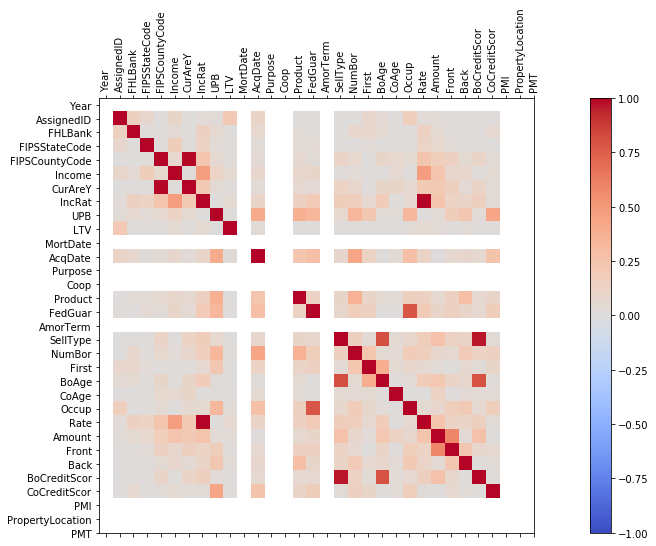

In [58]:
## Corelation between selected variables

corr = filtered_col_df.corr().abs()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
fig.set_size_inches(20,8)
ticks = np.arange(0,len(filtered_col_df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(filtered_col_df.columns)
ax.set_yticklabels(filtered_col_df.columns)
plt.show()

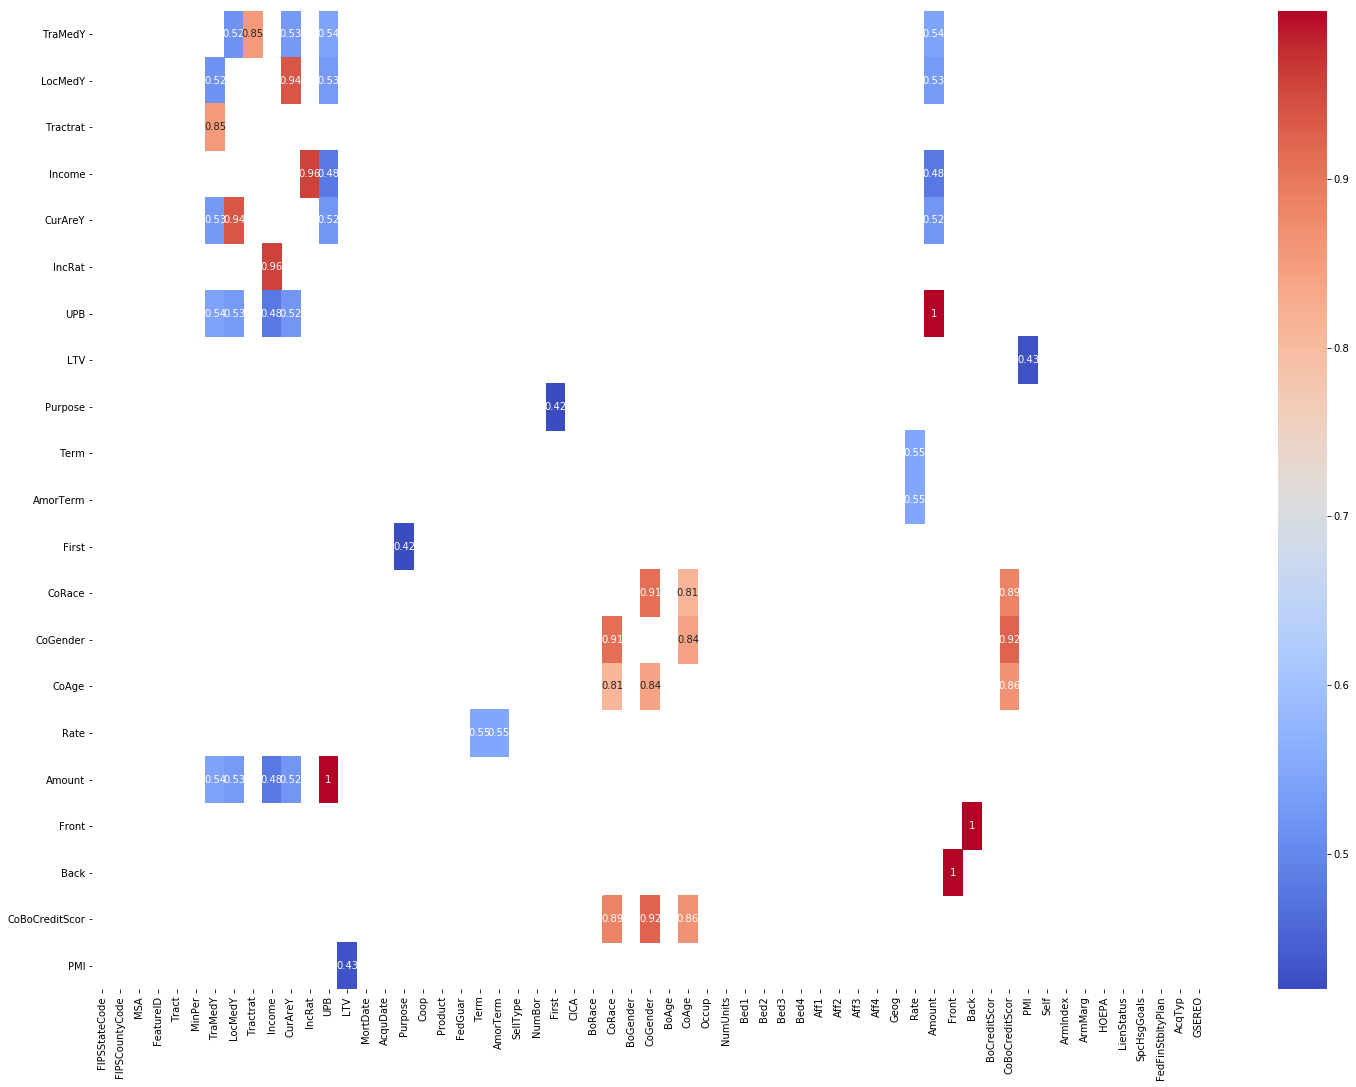

In [96]:
#Co-relation on 2017 data

corr = data_corr.corr()
corr2 = corr[(corr >0.4) & (corr !=1)]
corr3 = corr2.dropna(thresh=1)
from matplotlib import pyplot
pyplot.figure(figsize=(25, 18))
sns.heatmap(corr3, cbar = True,   annot=True,  cmap= 'coolwarm')

In [59]:
## Variables with maximum corelation

max_corr_vars = (corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
print(max_corr_vars)

UPB             Amount          0.999649
Income          IncRat          0.990678
NumBor          CoCreditScor    0.962530
                CoAge           0.809802
CoAge           CoCreditScor    0.797607
AmorTerm        Rate            0.787677
Front           Back            0.589225
CurAreY         UPB             0.472502
                Amount          0.472332
Purpose         First           0.434996
LTV             PMI             0.430285
                Purpose         0.402537
BoAge           CoAge           0.394667
LTV             FedGuar         0.375144
FedGuar         First           0.366472
LTV             First           0.333850
                Rate            0.331537
                AmorTerm        0.330886
FedGuar         BoCreditScor    0.281606
Purpose         AmorTerm        0.278436
                Rate            0.275366
NumBor          Front           0.264863
Front           CoCreditScor    0.258461
Purpose         PMI             0.254127
Amount          

# Correlations:
##### Lets start with income amount and rate:

In [97]:
amount_rate_income = data[["Amount", "Rate", "Income" ]]

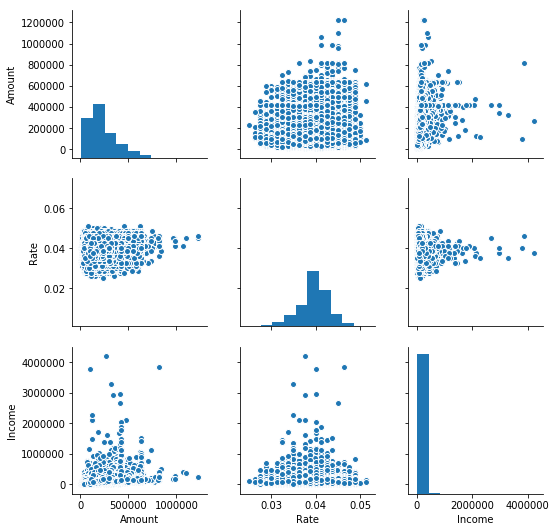

In [98]:
sns.pairplot(amount_rate_income.dropna())

##### No strong correlations found here, need to to analyze it at indivisual level

#### Lets Consider FICO

In [99]:
#2017 data

print("Average Interest Rate: ")
c1 = data[data["BoCreditScor"] ==1].describe()["Rate"]['mean']
c2 = data[data["BoCreditScor"] ==2].describe()["Rate"]['mean']
c3 = data[data["BoCreditScor"] ==3].describe()["Rate"]['mean']
c4 = data[data["BoCreditScor"] ==4].describe()["Rate"]['mean']
c5 = data[data["BoCreditScor"] ==5].describe()["Rate"]['mean']


print("1) CREDIT SCORE = <620 \nAverage interest rate =",c1,"\n\n2)CREDIT SCORE = 620 to < 660\nAverage interest rate =",c2," \n\n3) CREDIT SCORE = 660 < 700\nAverage interest rate = ",c3," \n\n4) CREDIT SCORE =700 < 760\nAverage interest rate = ",c4," \n\n5) CREDIT SCORE = 760\nAverage interest rate = ",c5)
print("\n\n\nPrime Interest Rates in 2017:\n12/14/2017 4.50%\n06/15/2017 4.25%\n03/16/2017 4.00%\n\n*Soucre: https://www.jpmorganchase.com/corporate/About-JPMC/historical-prime-rate.htm ")
print("\n\nGood the score, less the interest rate")

Average Interest Rate: 
1) CREDIT SCORE = <620 
Average interest rate = 0.040911538461538464 

2)CREDIT SCORE = 620 to < 660
Average interest rate = 0.04045406582768636  

3) CREDIT SCORE = 660 < 700
Average interest rate =  0.04049320629660314  

4) CREDIT SCORE =700 < 760
Average interest rate =  0.039878112867833646  

5) CREDIT SCORE = 760
Average interest rate =  0.039161233774924094



Prime Interest Rates in 2017:
12/14/2017 4.50%
06/15/2017 4.25%
03/16/2017 4.00%

*Soucre: https://www.jpmorganchase.com/corporate/About-JPMC/historical-prime-rate.htm 


Good the score, less the interest rate


In [100]:
#2017 data

c1 = data[data["BoCreditScor"] == 1].describe()["Amount"]['mean']
c2 = data[data["BoCreditScor"] == 2].describe()["Amount"]['mean']
c3 = data[data["BoCreditScor"] == 3].describe()["Amount"]['mean']
c4 = data[data["BoCreditScor"] == 4].describe()["Amount"]['mean']
c5 = data[data["BoCreditScor"] == 5].describe()["Amount"]['mean']

print("1 = <620 \nAverage LTV =",c1,"\n\n2 = 620 to < 660\nAverage LTV =",c2," \n\n3 = 660 < 700\nAverage LTV = ",c3," \n\n4 =700 < 760\nAverage LTV = ",c4," \n\n5 = 760\nAverage LTV = ",c5)
print("\nHere people with more Credit score got higher amount of Loan\n\n\n")

1 = <620 
Average LTV = 157471.61538461538 

2 = 620 to < 660
Average LTV = 174912.33107454018  

3 = 660 < 700
Average LTV =  203647.8097763049  

4 =700 < 760
Average LTV =  232021.93501378497  

5 = 760
Average LTV =  238662.67549846112

Here people with more Credit score got higher amount of Loan





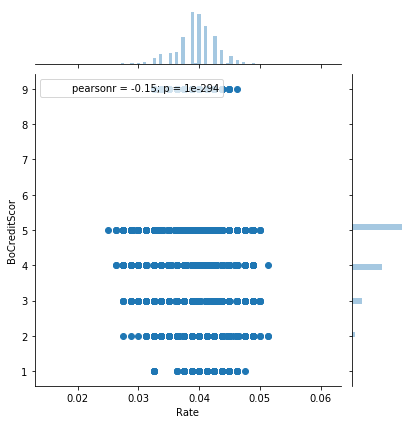

In [101]:
sns.jointplot('Rate','BoCreditScor',data,kind='scatter')

#### Lets try State wise interest rate

In [102]:
data_with_states = data.merge(state_df, how='left')
data_with_states =data_with_states.rename(columns = {"Name": "Property_State"})
data_with_states.head()

,Year,Assigned ID,Bank,FIPSStateCode,FIPSCountyCode,MSA,FeatureID,Tract,MinPer,TraMedY,...,Corace4,Corace5,HOEPA,LienStatus,SpcHsgGoals,FedFinStbltyPlan,AcqTyp,GSEREO,Property_State,Postal Code
0,2017,2092102,Atlanta,72,15,25020,1609553,2802.02,99.15,15863,...,6,6,2,1,2,2,1,2,Puerto Rico,PR
1,2017,2092103,Atlanta,66,10,99999,9999999999,9540.00,92.90,75804,...,6,6,2,1,2,2,1,2,Guam,GU
2,2017,2092104,Atlanta,66,10,99999,1389637,9563.00,92.90,49250,...,6,6,2,1,2,2,1,2,Guam,GU
3,2017,2092105,Atlanta,48,439,19100,1337443,1141.03,25.31,102791,...,6,6,2,1,2,2,1,2,Texas,TX
4,2017,2092106,Atlanta,6,99,33700,277574,32.02,71.74,58235,...,6,6,2,1,2,2,1,2,California,CA


In [103]:
#2017 data

states = set(data_with_states["Property_State"])
clean_states = list(states)
clean_states.remove(clean_states[0])

In [104]:
rate_state={}
for bank in clean_states:
    rate = data_with_states[data_with_states["Property_State"] =="{0}".format(bank)].describe()["Rate"]['mean']
    rate_state[bank] = rate

In [105]:
rate_state_df = pd.DataFrame(list(rate_state.items()), columns=["State","Avg_Rate"])

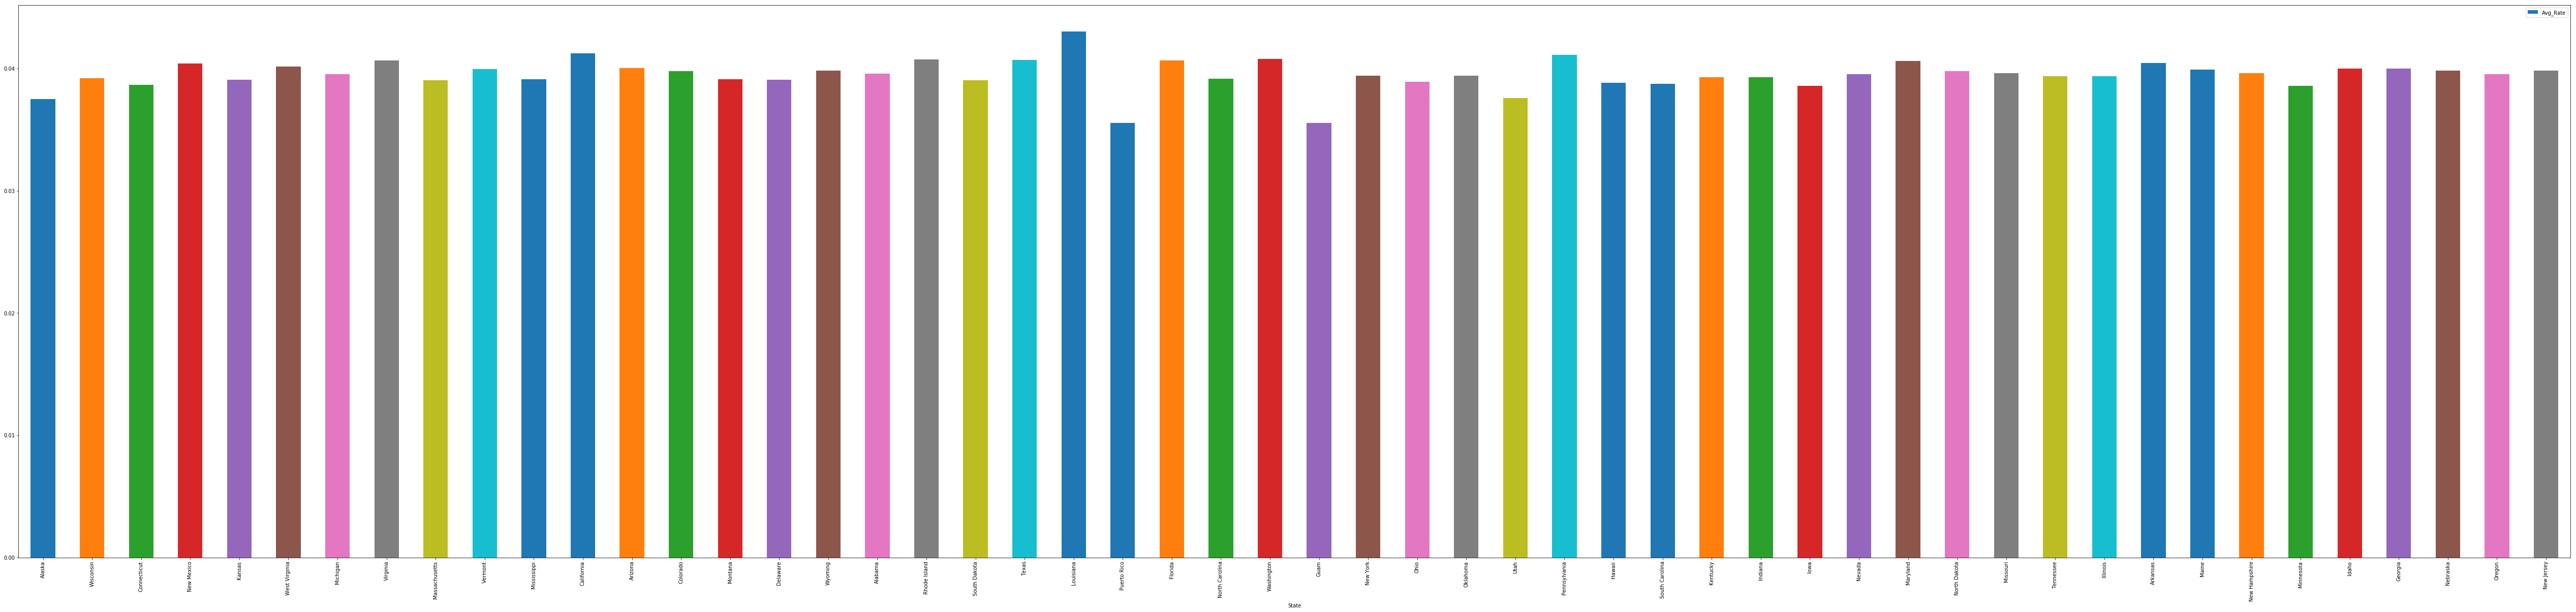

In [106]:
rate_state_df.plot(x='State', y='Avg_Rate', kind="bar", figsize=(90, 20))

In [107]:
#2017 data

rate_state_df

,State,Avg_Rate
0,Alaska,0.037517
1,Wisconsin,0.039213
2,Connecticut,0.038665
3,New Mexico,0.040428
4,Kansas,0.039103
5,West Virginia,0.040154
6,Michigan,0.039548
7,Virginia,0.040650
8,Massachusetts,0.039045
9,Vermont,0.039975


#### Lets try location wise (Federal Home Loan Bank District)

In [108]:
#2017 data

for bank in set(data["Bank"]):
    print("Average Interest Rate in :",bank)
    print(data[data["Bank"] =="{0}".format(bank)].describe()["Rate"]['mean'],"\n")

Average Interest Rate in : Chicago
0.039630017369335795 

Average Interest Rate in : Des Moines
0.03893721350187584 

Average Interest Rate in : New York
0.03952871287128691 

Average Interest Rate in : Pittsburgh
0.04161394998493644 

Average Interest Rate in : Cincinnati
0.03888262222222253 

Average Interest Rate in : Atlanta
0.036659400749063785 

Average Interest Rate in : San Francisco
0.04161605972323505 

Average Interest Rate in : Boston
0.03916183929116966 

Average Interest Rate in : Indianapolis
0.03942237391747393 

Average Interest Rate in : Dallas
0.042373804971320185 

Average Interest Rate in : Topeka
0.03935838196590042 



In [109]:
# Sampling the data for visualization 
#******* 2015 data starts again ********#

sample_200 = filtered_col_df.sample(200)

In [61]:
data4 = sample_200.head(20)
display(HTML(data4.to_html()))

,Year,AssignedID,FHLBank,FIPSStateCode,FIPSCountyCode,Income,CurAreY,IncRat,UPB,LTV,MortDate,AcqDate,Purpose,Coop,Product,FedGuar,AmorTerm,SellType,NumBor,First,BoAge,CoAge,Occup,Rate,Amount,Front,Back,BoCreditScor,CoCreditScor,PMI,PropertyLocation,PMT
4180,2015,1985533,Chicago,55,51,841855,59900,14.0543,240000,0.88,2015,2015,1,2,1,0,15,1,4,2,37,68,2,0.0338,240000,0.0394,0.1739,5,4,0.12,Wisconsin,20660.6
11169,2015,1968438,Cincinnati,21,211,143201,65400,2.1896,416386,0.73,2015,2015,2,2,1,0,30,1,2,1,52,54,1,0.0388,417000,0.2300,0.2300,5,5,0.00,Kentucky,23765
10504,2015,1967773,Cincinnati,39,49,84804,71000,1.1944,162700,0.62,2015,2015,2,2,1,0,30,1,1,2,64,98,1,0.0375,162700,0.2100,0.2100,5,9,0.00,Ohio,9125.46
2582,2015,1982398,Boston,25,21,42432,88800,0.4778,160000,0.54,2015,2015,2,2,1,0,30,1,1,2,61,98,1,0.0400,160000,0.3267,0.4330,4,9,0.00,Massachusetts,9252.82
13544,2015,1986957,Cincinnati,21,209,60360,68200,0.8850,104533,0.46,2015,2015,2,2,1,0,15,1,1,2,41,98,1,0.0288,105000,0.1700,0.2400,5,9,0.00,Kentucky,8719.33
19977,2015,1951221,Des Moines,46,127,24398,59600,0.4094,51454,0.76,2015,2015,1,2,1,3,30,1,1,1,21,98,1,0.0388,51454,0.2256,0.4022,3,9,0.00,South Dakota,2932.39
24145,2015,1974806,Indianapolis,18,141,132984,55400,2.4004,133000,0.73,2014,2015,1,2,1,0,15,1,1,2,44,98,1,0.0313,133000,0.0900,0.3300,5,9,0.00,Indiana,11246
24303,2015,1974964,Indianapolis,26,81,84428,64600,1.3069,198450,0.90,2015,2015,1,2,1,0,30,1,2,2,29,29,1,0.0375,198450,0.2100,0.2300,5,5,0.25,Michigan,11130.6
37305,2015,1983666,New York,36,91,75588,78100,0.9678,207000,0.90,2015,2015,1,2,1,0,30,1,2,1,29,35,1,0.0413,207000,0.2350,0.2815,5,4,0.25,New York,12160.5
2952,2015,1961506,Chicago,55,39,69972,67800,1.0320,175750,0.95,2015,2015,1,2,1,0,30,1,1,2,51,98,1,0.0363,175750,0.2344,0.3939,4,9,0.30,Wisconsin,9712.03


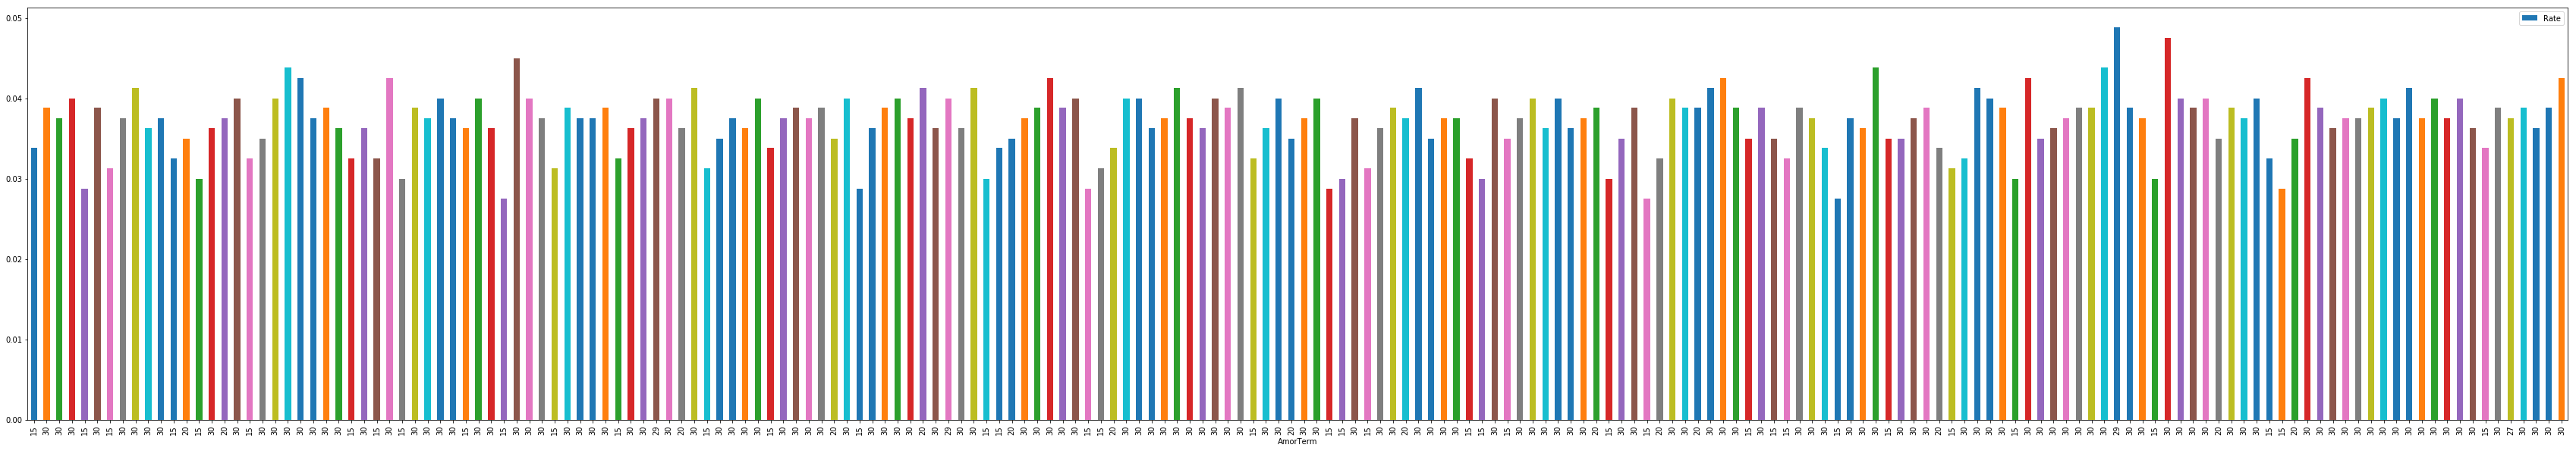

In [67]:
#Plotting AmorTerm and Rate ---> Corr value = 0.78

sample_200.plot(x="AmorTerm", y="Rate", kind = "bar", figsize=(60,10))

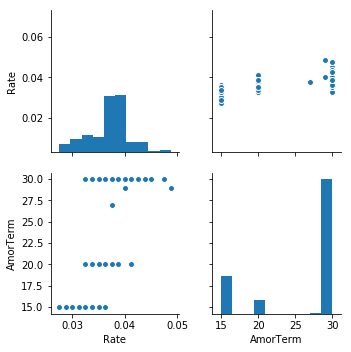

In [64]:
#Using a pairplot
sns.pairplot(sample_200[['Rate', 'AmorTerm']])

Seems, higher the AmorTerm, higher the rate. Taking mean rate for different 
AmorTerms 

In [68]:
sample_200['AmorTerm'].unique()

array([15, 30, 20, 29, 27])

In [71]:
print("Average Interest Rate: ")
c1 = filtered_col_df[filtered_col_df["AmorTerm"] ==15].describe()["Rate"]['mean']
c2 = filtered_col_df[filtered_col_df["AmorTerm"] ==30].describe()["Rate"]['mean']
c3 = filtered_col_df[filtered_col_df["AmorTerm"] ==20].describe()["Rate"]['mean']
c4 = filtered_col_df[filtered_col_df["AmorTerm"] ==29].describe()["Rate"]['mean']
c5 = filtered_col_df[filtered_col_df["AmorTerm"] ==27].describe()["Rate"]['mean']


print("1) AmorTerm = 15 \nAverage interest rate =",c1,"\n\n2)AmorTerm = 30\nAverage interest rate =",c2," \n\n3) AmorTerm = 20\nAverage interest rate = ",c3," \n\n4) AmorTerm =29\nAverage interest rate = ",c4," \n\n5) AmorTerm = 27\nAverage interest rate = ",c5)
print("\n\n\nPrime Interest Rates in 2017:\n12/14/2017 4.50%\n06/15/2017 4.25%\n03/16/2017 4.00%\n\n*Soucre: https://www.jpmorganchase.com/corporate/About-JPMC/historical-prime-rate.htm ")
print("\n\n We can strongly conclude the above assumption")

Average Interest Rate: 
1) AmorTerm = 15 
Average interest rate = 0.031390153092467066 

2)AmorTerm = 30
Average interest rate = 0.038940242583664145  

3) AmorTerm = 20
Average interest rate =  0.03634135838150092  

4) AmorTerm =29
Average interest rate =  0.03985958702064882  

5) AmorTerm = 27
Average interest rate =  0.03739574468085106



Prime Interest Rates in 2017:
12/14/2017 4.50%
06/15/2017 4.25%
03/16/2017 4.00%

*Soucre: https://www.jpmorganchase.com/corporate/About-JPMC/historical-prime-rate.htm 


 We can strongly conclude the above assumption


# Income Vs PMT

Looking at the pairplot, we can say the monthly payment is highly co-related to the total income of the borrower. 

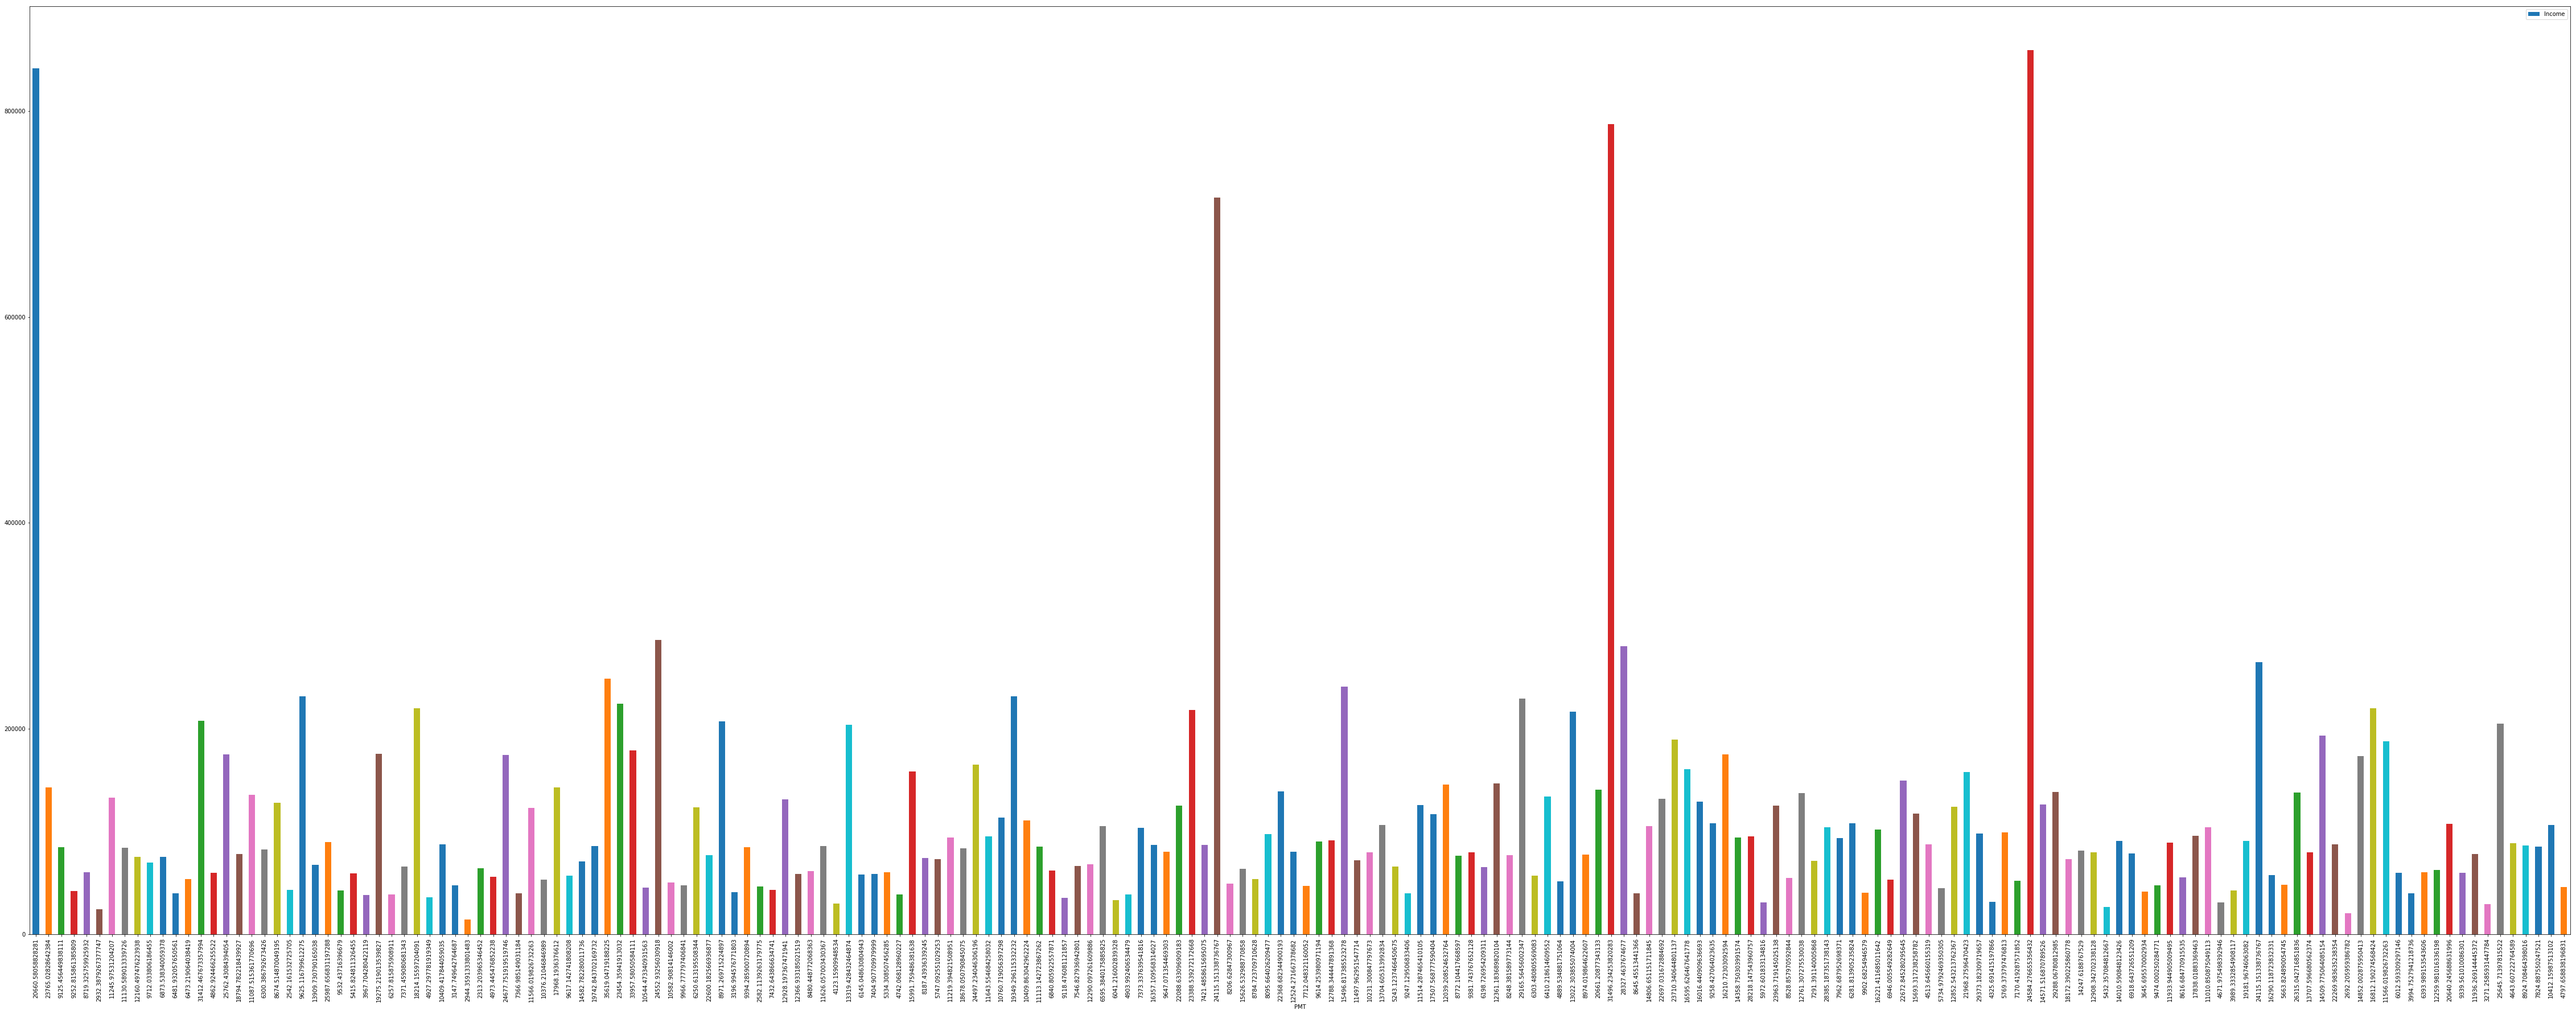

In [74]:
#Plotting PMT, Income and Rate ---> Corr value = 0.78

sample_200.plot(x="PMT", y='Income', kind = "bar", figsize=(80, 30))

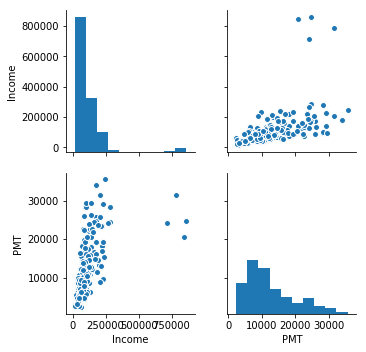

In [75]:
sns.pairplot(sample_200[['Income','PMT']])

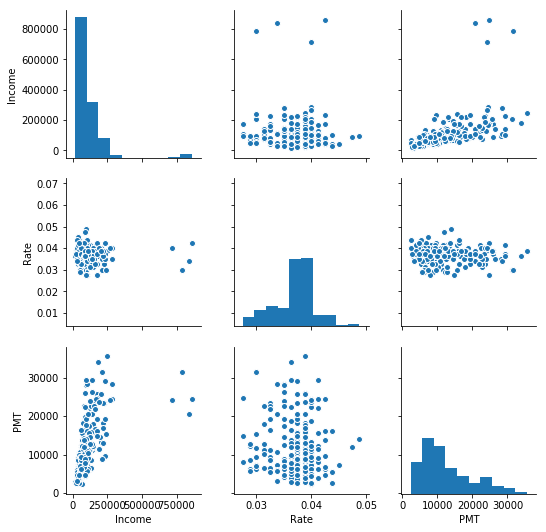

In [76]:
sns.pairplot(sample_200[['Income','Rate','PMT']])

# Let's track down how LTV affects the mortgage applications.

In [77]:
max_LTV_df = sample_200.sort_values('LTV', ascending=False)

In [78]:
min_LTV_df = filtered_col_df.sort_values('LTV', ascending=True)

In [92]:
max_LTV_df.head(10)

,Year,AssignedID,FHLBank,FIPSStateCode,FIPSCountyCode,Income,CurAreY,IncRat,UPB,LTV,...,Occup,Rate,Amount,Front,Back,BoCreditScor,CoCreditScor,PMI,PropertyLocation,PMT
4717,2015,1986070,Chicago,17,77,43500,57400,0.7578,42000,1.05,...,1,0.0438,42000,0.1152,0.3334,3,9,0.0,Illinois,2542.16
3119,2015,1961673,Chicago,17,21,47840,57400,0.8334,56122,1.00,...,1,0.0375,56122,0.1036,0.3557,4,9,0.0,Illinois,3147.75
3901,2015,1962455,Chicago,39,63,99108,53600,1.8490,101234,1.00,...,1,0.0388,101234,0.0763,0.1611,4,3,0.0,Ohio,5769.37
46259,2015,1994080,Topeka,8,41,87720,73400,1.1951,403000,1.00,...,1,0.0363,403000,0.2880,0.5191,5,5,0.0,Colorado,22270
32371,2015,1999821,Indianapolis,18,39,62328,53300,1.1694,114782,0.99,...,1,0.0425,114782,0.1700,0.2100,2,9,0.0,Indiana,6840.81
47231,2015,1995052,Topeka,8,41,216744,73400,2.9529,235653,0.97,...,1,0.0363,235653,0.1613,0.5468,3,2,0.0,Colorado,13022.3
21074,2015,1952318,Des Moines,19,91,146983,59300,2.4786,213442,0.95,...,1,0.0400,213750,0.1311,0.2879,3,3,0.3,Iowa,12361.2
23811,2015,1974472,Indianapolis,26,161,90470,87400,1.0351,166250,0.95,...,1,0.0400,166250,0.1100,0.3100,5,4,0.3,Michigan,9614.25
5695,2015,1962964,Cincinnati,39,57,60000,60500,0.9917,161500,0.95,...,1,0.0400,161500,0.2400,0.2800,5,9,0.3,Ohio,9339.56
1222,2015,1958564,Boston,23,13,193247,54900,3.5200,254600,0.95,...,1,0.0388,254600,0.1222,0.2908,3,3,0.3,Maine,14509.8


/Users/ujwal/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


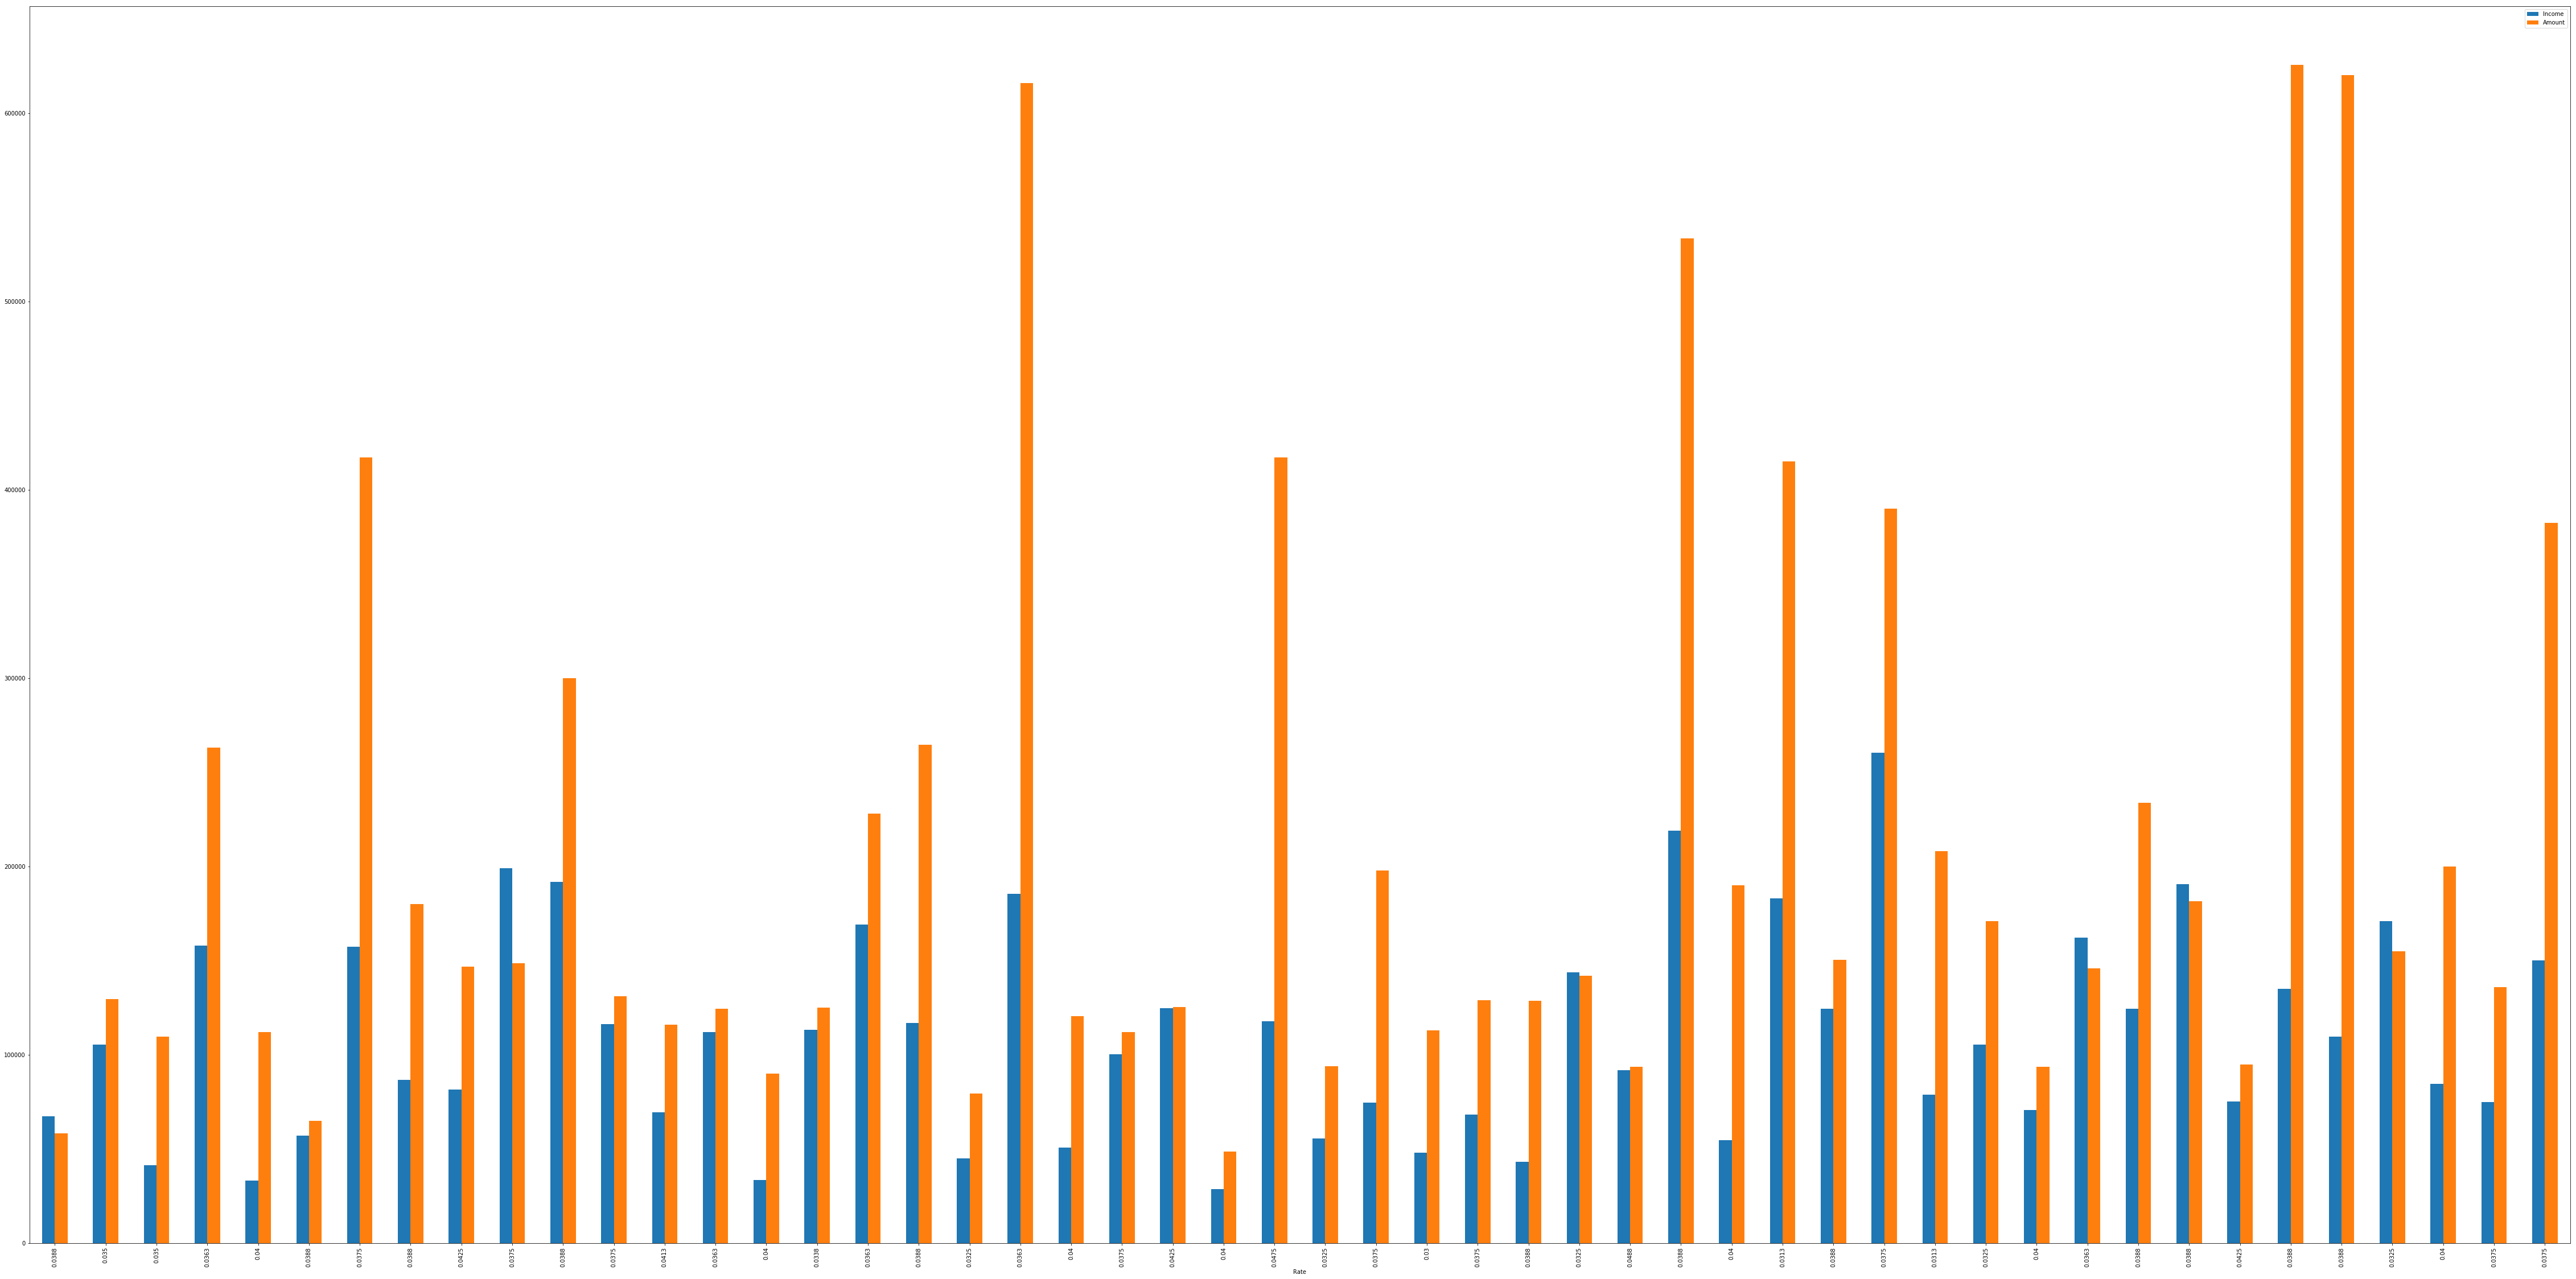

In [83]:
min_ltv_sample = min_LTV_df.sample(50)
min_ltv_sample.plot(x='Rate', y=['Income', 'Amount'], figsize=(80,40), kind = "bar")

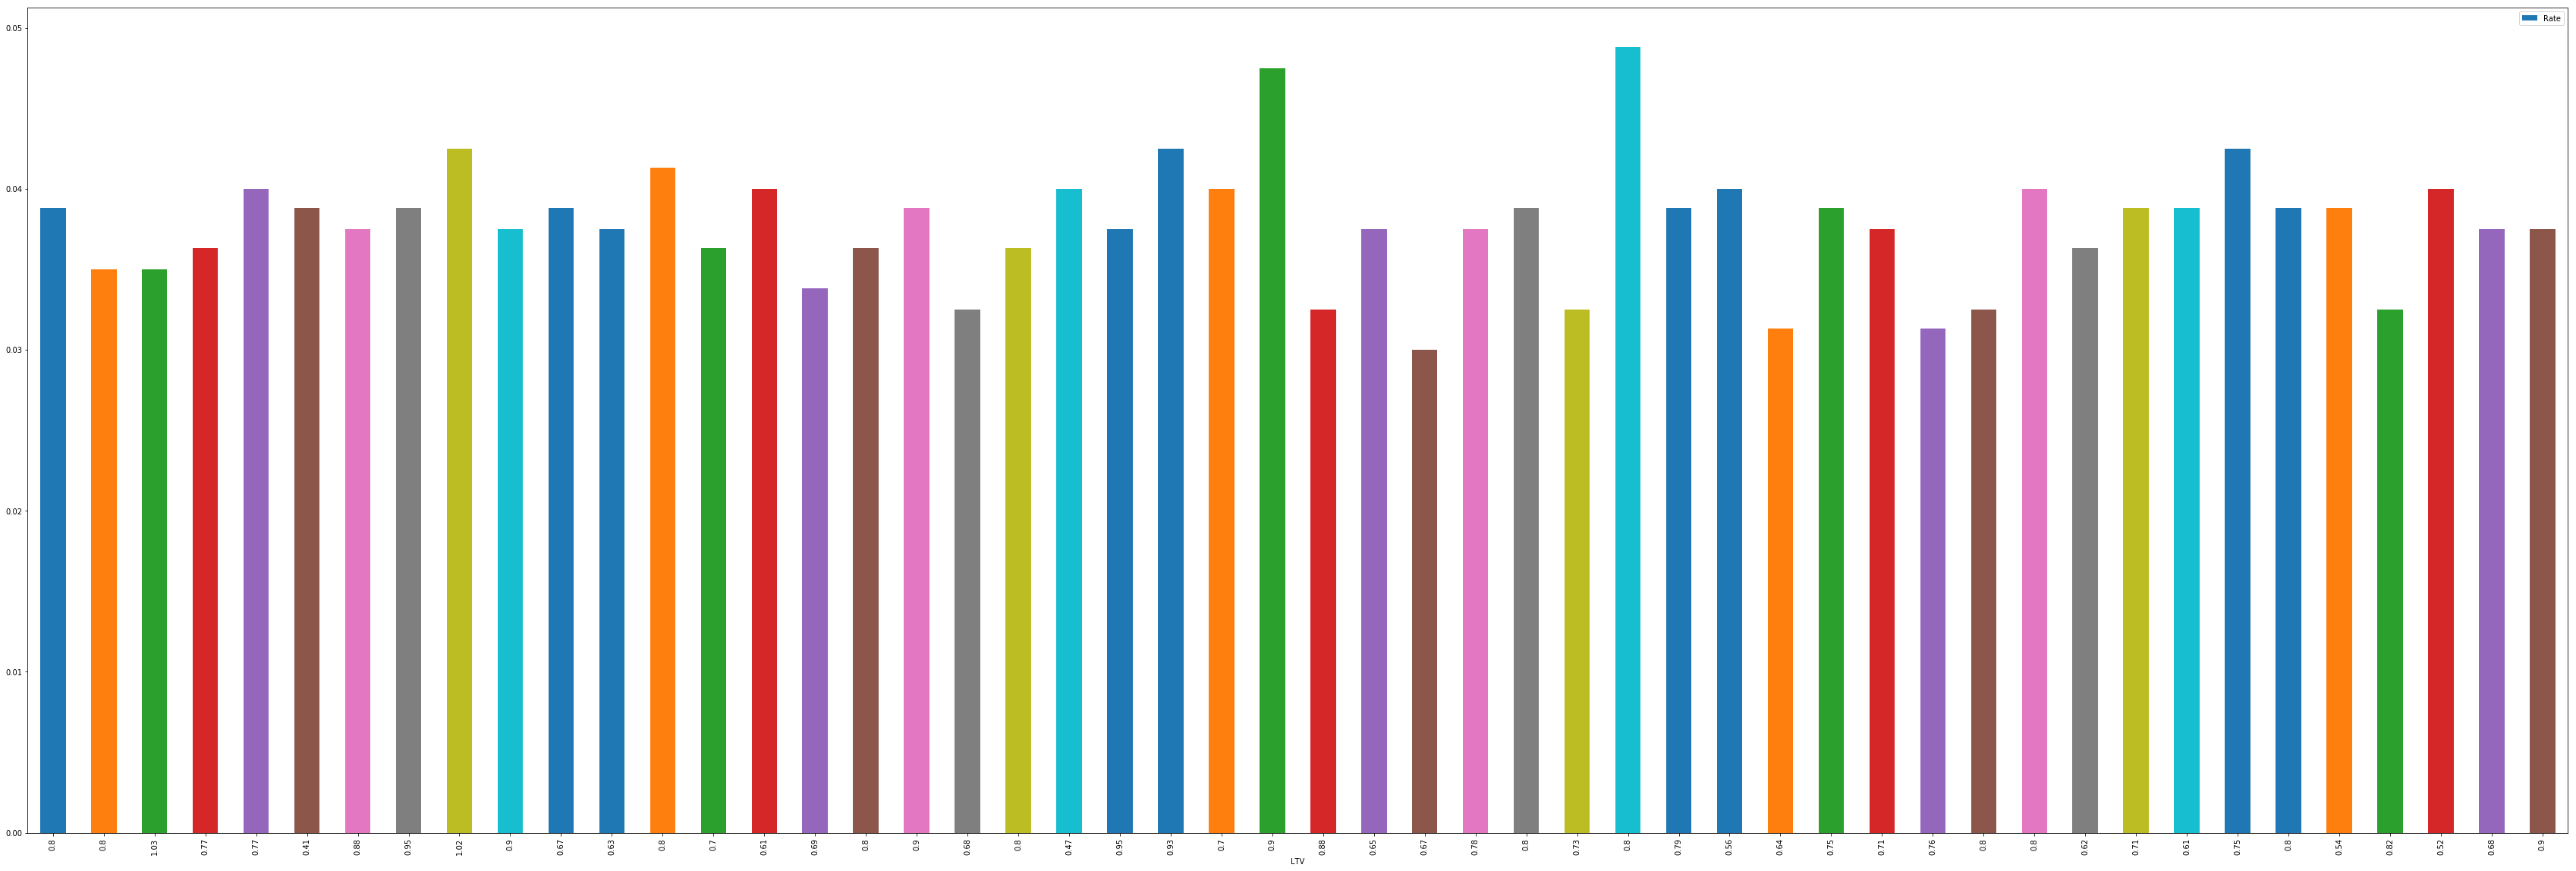

In [87]:
min_ltv_sample.plot(x="LTV", y="Rate", kind="bar", figsize=(60,20))

/Users/ujwal/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


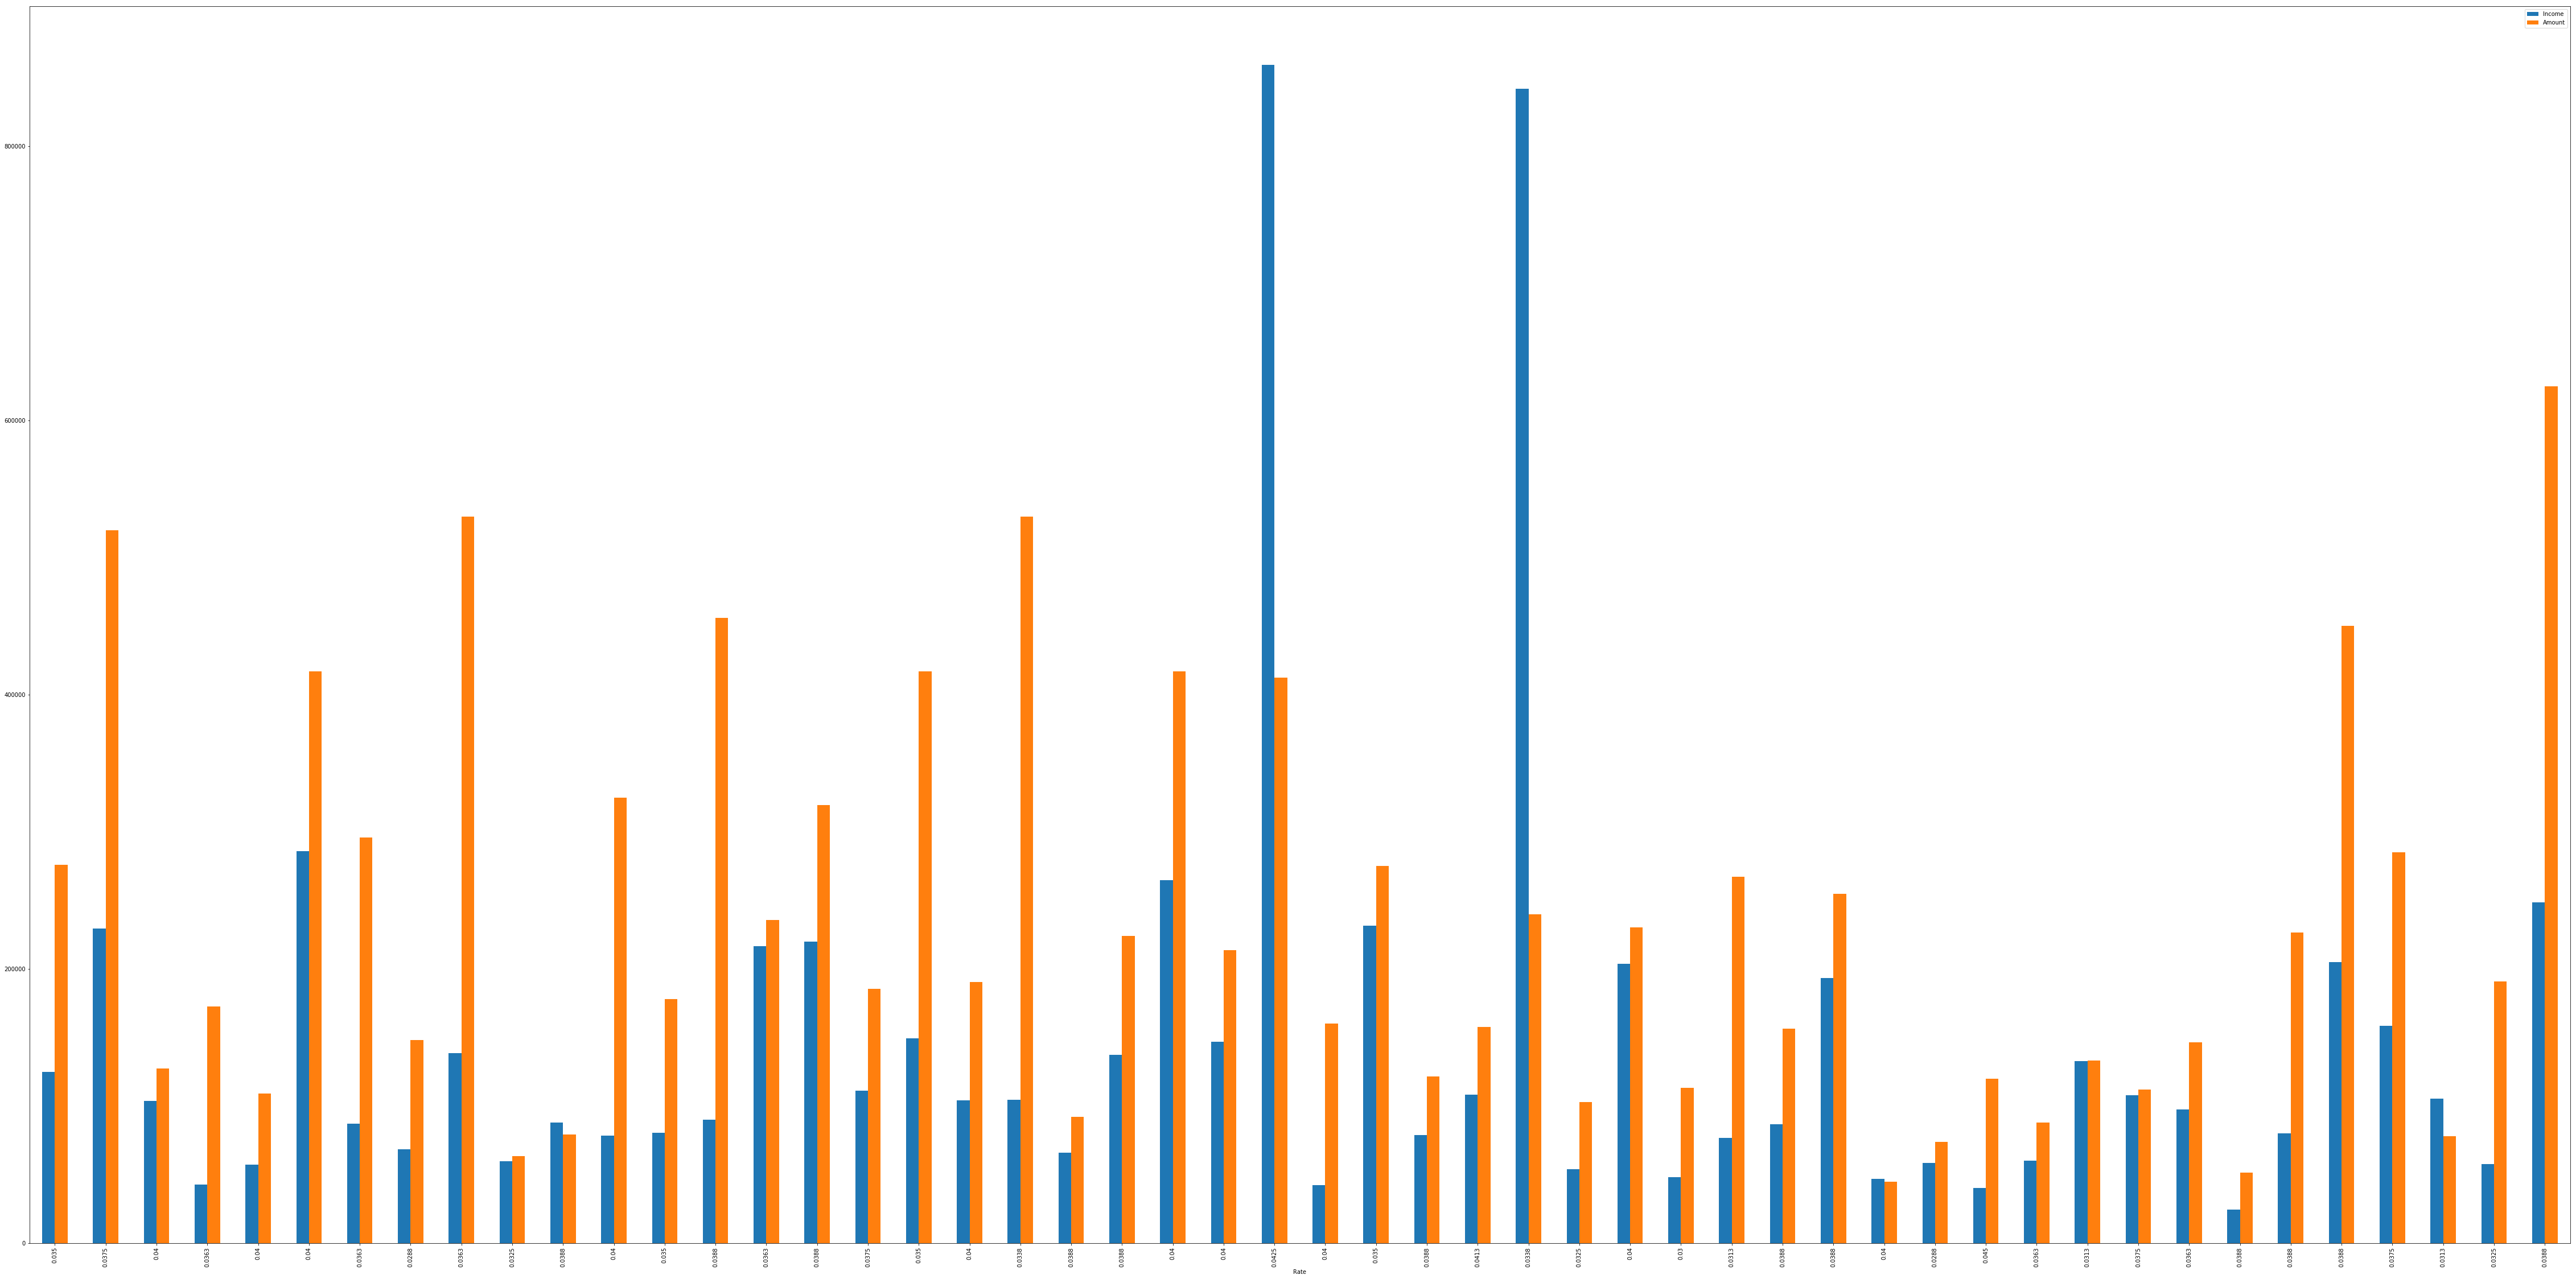

In [88]:
max_ltv_sample = max_LTV_df.sample(50)
max_ltv_sample.plot(x='Rate', y=['Income', 'Amount'], figsize=(80,40), kind = "bar")

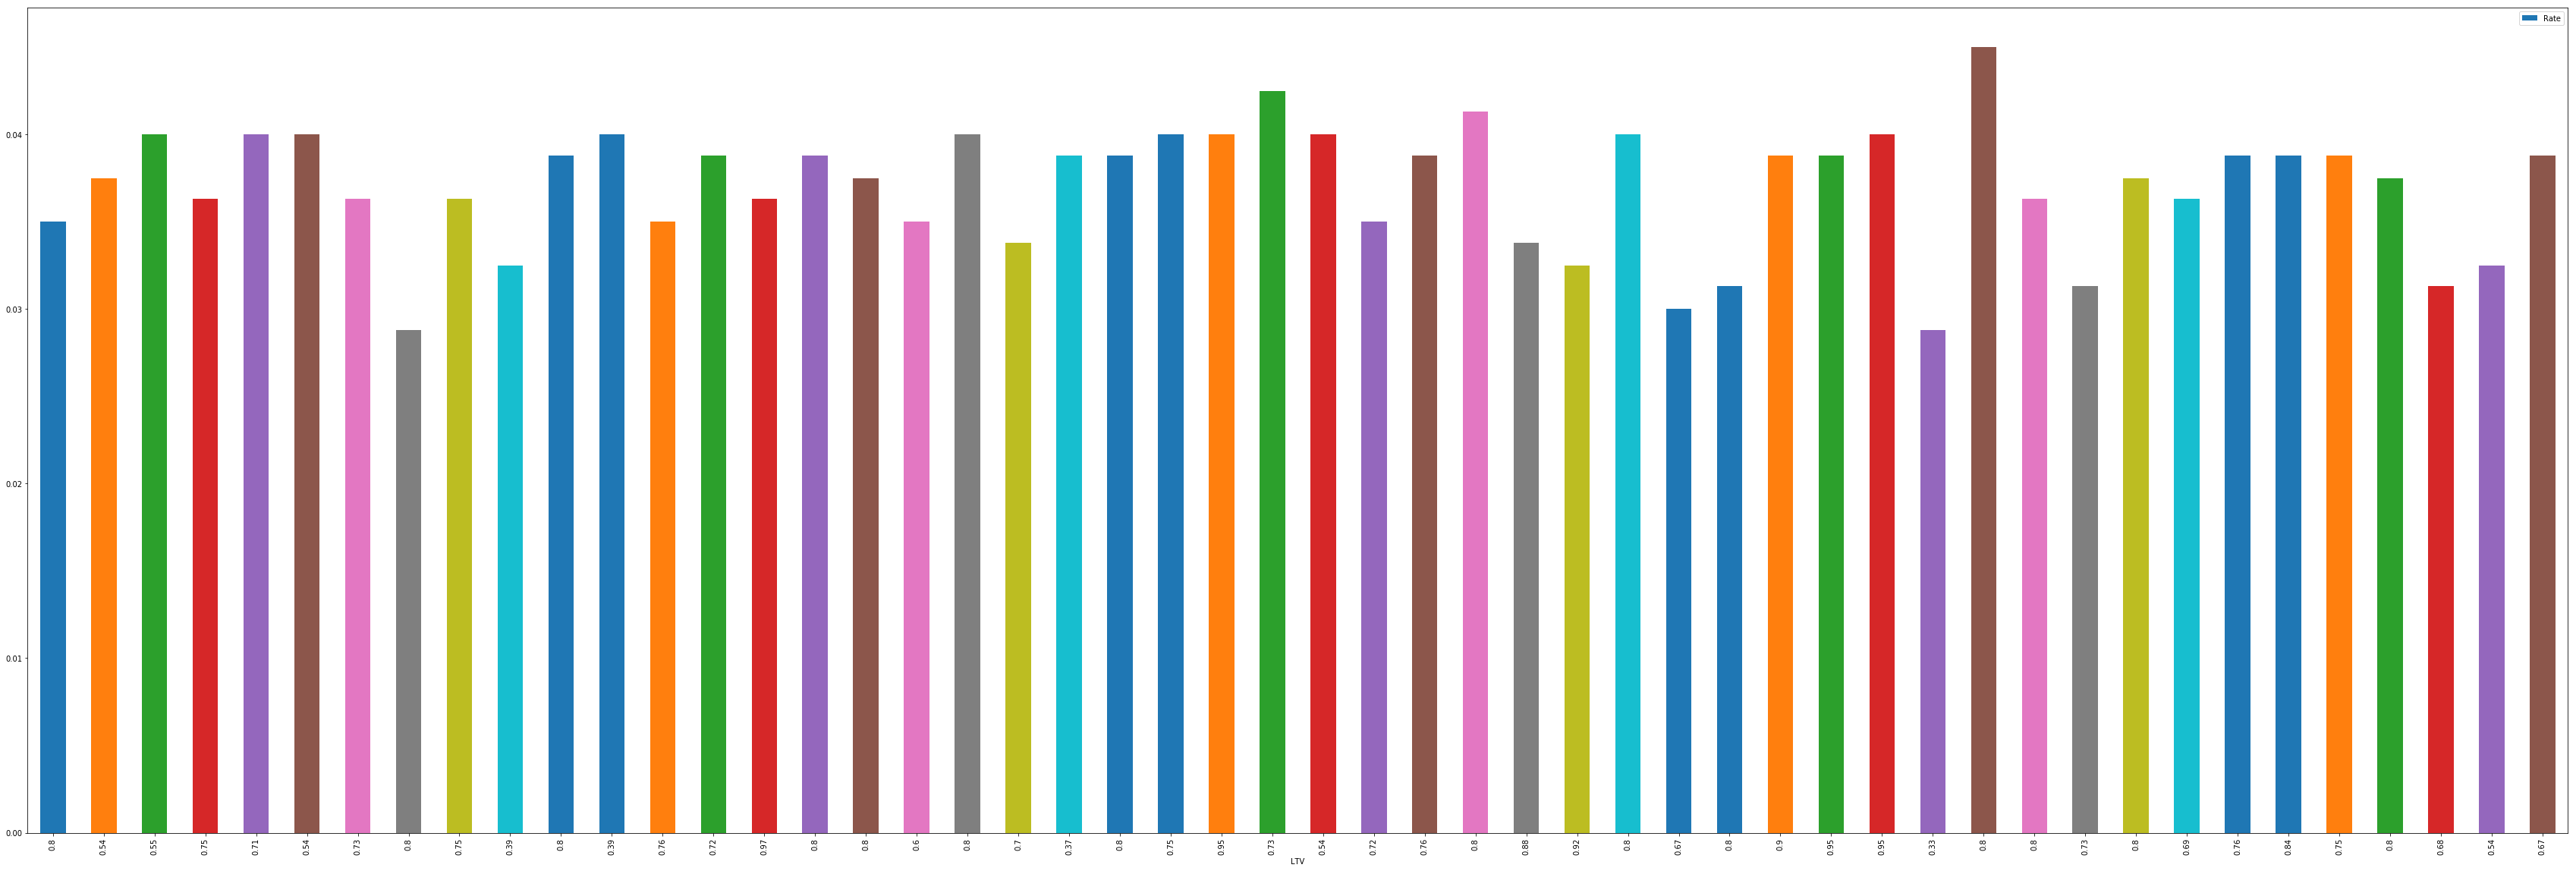

In [89]:
max_ltv_sample.plot(x="LTV", y="Rate", kind="bar", figsize=(60,20))

# No concrete evidence that proves higher LTV causes higher interest rate

Taking mean rate on max and min LTV dataFrames 

In [93]:
print("Average Interest rates for LTV")

c1 = filtered_col_df[filtered_col_df['LTV']<=0.78].describe()["Rate"]['mean']
c2 = filtered_col_df[filtered_col_df['LTV']>=0.80].describe()["Rate"]['mean']
print("1) \nAverage interest rate for Min LTV=",c1,"\n\n2)\nAverage interest rate for Max LTV =",c2)

Average Interest rates for LTV
1) 
Average interest rate for Min LTV= 0.03621318966695637 

2)
Average interest rate for Max LTv = 0.03833454537984415


Interest Rate goes high if the LTV is greater than 80%

# Considering all the pre-processing, we can define range of thresholds.

IDEA:

1) Define minimum band which the application should lie under
2) Create a baseline machine learning model and train the model with respect to these range of values
3) Test the model whether it approves an application if it lies under all /most of the thresholds